### Constrained proteome allocation affects coexistance in models of competitive microbial communities 

#### Samuele Pio Lipani 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import glob
import os
import matplotlib.animation as animation

Microbes are among the most abundant life forms on Earth in terms of biomass. They are found in almost every habitat of our planet, and continue to surprise us with their ability to survive in places that were thought to be inhospitable and barren.

Because of their ubiquity, microbial communities play fundamental roles in countless natural processes of vital importance, from the digestion and overall health of their host organism to the regulation of biogeochemical cycles.
However we still know little about the fundamental mechanisms that regulate microbial communities, partly because we are only able to grow them in labs but a very small fraction of those present in nature or because their dynamics is non linear and difficult to predict. 

We are interested then in understanding for example how competition and metabolic interactions allow such systems to maintain the very high level of biodiversity found in nature. In particular some recent experimental studies were focused on showing that the structure and composition of microbial communities are tightly linked to the $\textbf{metabolism}$ of the species that inhabit them.
We can wonder how species uptake and use different resources for growth and proliferation and how these processes affect the dynamics of the entire community. Resource uptake is constrained by the other functions that a cell must perform to grow and proliferate, and the balance between such functions is governed by the allocation of of the internal resources of the cell like the $\textbf{proteome}$ that is the set of preteins expressed by a cell for different tasks.

##### Consumer-proteome-resource model CPR, setting
The proteome of a single microbial species growing on a single resource can be minimally divided into three sectors: 
- one dedicated to nutrient uptake and metabolism ("P-sector"), $\varphi^P$;
- one dedicated to ribosomal proteins responsible for biomass production and growth ("R-sector"), $\varphi^R$;
- one dedicated to housekeeping functions ("Q-sector") which is incompressible, $\varphi^Q$.

Since all proteome fractions for a single cell must sum to one we must have $\varphi^P + \varphi^R + \varphi^Q = 1$.
In previous works of Scott et al. these fractions are found to be linear functions of the species growth rate $g$ such that:
$$
\varphi^P = \frac{\rho}{\bar{k}^n}g \\
\varphi^R = \frac{\rho}{k^t}g + \varphi^0
$$

Where $\rho$ is a conversion factor (equal to the total mass of  the ribosomal proteins and the total RNA mass of the cells) and $\bar{k}^n(c) = k^n \cdot r(c)$, where $r(c)=c/(K+c)$ is the Monod function which encapsulates the dependence on the resource concentration $c$. We will see that the following analysis will not depend on the analytical form of $r(c)$ as long as it is a monotonically increasing function that saturates for large values of $c$. $K$ is the half-saturation constant of the resource and $k^n$ is the "nutritional capacity of the (only) limiting resource. 
This parameter measures how much protein biomass is produced per unit ribosomal mass per unit time $[1/s]$, and therefore depends on how much energy the resource contains and how efficiently the microbial species can metabolize it.
The parameter $k^t$ is the "translational capacity" of the microbial species, measuring how much protein biomass is produced per unit ribosomal mass per unit time; it is a measure of how fast the microbial species expresses its genome to synthetize proteins. Finalle $\varphi^0$ is the incompressible core of $\varphi^R$, representing the fact that ribosomal proteins are present in the cells even when microbes are not growing.
All of the previous analysis works when we have a consumer and a resource but we could just generalize it to $N_R$ resources and $N_S$ species.

We can indicate with $\varphi_{\sigma i}^P$ the proteome fraction allocated by species $\sigma$ to the uptake and metabolization of resource $i$, the total proteome fraction allocated by species $\sigma$ to nutrient uptake and metabolism is given by $\varphi_{\sigma}^P = \sum_{i=1}^{N_R} \varphi_{\sigma i}^P$. As before to ensure that the sum of all the proteome fractions is equal to one we must have:
$$
\varphi_{\sigma}^Q + \varphi_{\sigma}^R +  \sum_{i=1}^{N_R} \varphi_{\sigma i}^P = 1
$$

This constraint represents the finiteness of a species proteome. For example, if more proteins need to be produced for metabolizing complex substrates (i.e the fraction $\varphi_{\sigma}^P$ increases), then a smaller part of the proteome will be available for biomass production (i.e the ribosomal fraction $\varphi_{\sigma}^R$ decreases). Species must balance this trade off in order to achieve optimal growth.

##### Classic consumer resource model simulations 

A community is a set of $N_S$ species that can only uptake some or all of the $N_R$ available resources. Species growth rates are determined by the types and the amount of resources they uptake, and are also regulated by a "maintenance cost", representing the fact that species need to uptake a minimum amount of resources in order to survive.

On the other hand resources can be thought of as substrates that are supplied to the system with given (constant) rates $s_i$, and they are uptaken by species in the community.

The model that describes the evolution of both species and resources is the following:
$$
\dot{m_{\sigma}} = m_{\sigma}(g_{\sigma} - q_{\sigma}) \ \ \ \ \  \sigma = 1, \dots, N_S, \\
\dot{c_i} = s_i - \sum_{\sigma = 1}^{N_S} J_{\sigma i} m_{\sigma} \ \ \ \ \ i = 1, \dots, N_R,
$$

Where $m_{\sigma}$ is th biomass density of species $\sigma$ and $g_{\sigma}$ is its growth rate. The parameter $q_{\sigma}$ is a manteinance cost, due to the fact that each species requires a minimum amount of energy per unit time to survive without growing. Finally, $c_i$ is the density resource $i$, $s_i$ is the constant resource supply rate i.e the growth of the $i$-th resource, and $J_{\sigma i}$ is the rate at which species $\sigma$ uptakes resource $i$ per unit biomass. The ways in which species uptake the available substrates are encoded in $J_{\sigma i}$ with parameters that are called metabolic strategies. In general $J_{\sigma i} \propto \alpha_{\sigma i}$ where $\vec{\alpha_{\sigma}} = (\alpha_{\sigma 1}, \dots, \alpha_{\sigma N_R })$ is the metabolic strategy of species $\sigma$. Therefore, in the consumer-resource framework the interactions between species are indirect and mediated by the abundance of resources and the species’resource preferences.

In order to make the equations more readable we can correlate the growth rate of each species with the metabolic strategies $J_{\sigma i}$ that are the rates of which each species uptake resources within the pool of $N_R$ number of resources.
Let's call $J_{\sigma i} = \alpha_{\sigma i}r_i(c_i)$ where $\alpha_{\sigma i}$ is the metabolic energy of species $\sigma$ devoted to eat resource $i$, the actual metabolic strategy, while $r_i(c_i) = \frac{c_i}{c_i + k_i}$ (with $k_i$ a resource specific constant that represents the "half velocity" constant meaning the value of $c_i$ when $r_i = 0.5$) is the Monod function useful for relating the growth of a species $\sigma$ with the concentration of a limiting nutrient indeed it is the per-enzyme rate of consumption of nutrient $i$. However any monotone increasing, continuously differentiable function of $c_i$ with $r_i(0) = 0$.

$$
\dot{m_{\sigma}} = m_{\sigma}\left(\sum_{i=1}^{N_R}v_{i}\alpha_{\sigma i}r_i(c_{i}) - q_{\sigma}\right) \ \ \ \ \  \sigma = 1, \dots, N_S, \\
\dot{c_i} = s_i - \sum_{\sigma = 1}^{N_S} m_{\sigma} \alpha_{\sigma i}r_i(c_i) \ \ \ \ \ i = 1, \dots, N_R,
$$

Then, $v_i < 1$ is the efficiency of resource conversion into biomass of species $\sigma$ (i.e. of converting food into new individuals).

<img src="./crmodel.PNG" width=300 height=300 />

Let's consider for this very simple model $r_i = c_i$ a linear function of the concetration of nutrients and resources inside the system.

In [2]:
def crm_solver(ns = 2, nr = 2, dt = 0.01, N = 100000, xlimend = 1000, seed =123, constraint = False, random_seed = False, plot = False):
    '''
    This function solves the ode system for the consumer resource model introducing stochasticity in the set of 
    parameters:
    ns = number of consumer species, 
    nr = number of resources,
    alpha = metabolic strategies, 
    q = manteinance costs, 
    v = the converting rate of food into new individuals,
    s = resource supply rate
    all those params are drawn randomly from a uniform distribution. 
    random_seed = True, then we make the model reproducible

    The second part of the function gives the plot of the consumer resource model for ns species and nr resources if 
    plot is set to True. 
    plot = False returns instead the numerical solution as a numpy array with the time series and the dynamics of 
    the species and resources

    Eventually the function returns a dictionary with:
    the time series = 't', 
    the dynamics of the consumers = 'species', 
    the dynamics of the resources = 'resources',
    the metabolic strategies = 'alpha',
    the efficacy producing energy from food = 'v',
    death rate for consumers = 'q',
    supply rate for resources = 's'
    '''
    if random_seed == True :
        np.random.seed(seed)
    dt = 0.01
    t = np.linspace(0, N*dt, N + 1)
    if constraint == True:
        w_i = np.random.uniform(0,1,3)
        E = np.sum(w_i) 
        temp = np.random.uniform(0,0.5, size = (ns,nr))
        temp = temp * w_i
        alpha = ((temp.T/temp.sum(axis = 1)).T)*E
    else: 
        alpha = np.random.uniform(0,0.5, size = (ns,nr))
    # the only parameter we have to set are the metabolic strategies 
    q = np.random.uniform(0,0.1,ns) 
    v = np.random.uniform(0,0.5,nr)
    s = np.random.uniform(0,1,nr)

    sol = np.zeros((N + 1, ns+nr))
    # inside sol there are four columns as the variables of the ode system and N + 1 row as the number of 
    # points we are going to end up with after the numeric integration
    sol[0,:] = 1
    # setting initial conditions to one for both consumers and resources 

    for n in range(N):
        sol[n+1,:ns] = sol[n,:ns] + dt*sol[n,:ns]*(np.dot(alpha,sol[n,ns:]*v) - q)
        sol[n+1,ns:] = sol[n,ns:] + dt*sol[n,ns:]*(s - np.dot(sol[n,ns:],np.dot(alpha.T,sol[n,:ns])))
    # plot part 
    if plot == True:
        color = [*['red' for i in range(ns)], *['blue' for i in range(nr)]]
        leg = [*['Species {}'.format(i+1) for i in range(ns)], *['Resource {}'.format(i+1) for i in range(nr)]]
        plt.figure(figsize = (10,7)) 
        for i in range(ns+nr):
            plt.plot(t, sol[:,i], color = color[i], label = leg[i])
            plt.xlim(0,xlimend)
            # plt.ylim(0,2)
        # plt.yscale('log')
        plt.xlabel('t (hours)')
        plt.ylabel('Fraction of species')
        plt.grid()
        plt.legend()
        plt.show()
    else: 
        return {'t': t,'species': sol[:,:ns],'resources': sol[:,ns:],'alpha': alpha,'v': v, 'death': q, 'supply': s}

Dynamics example:

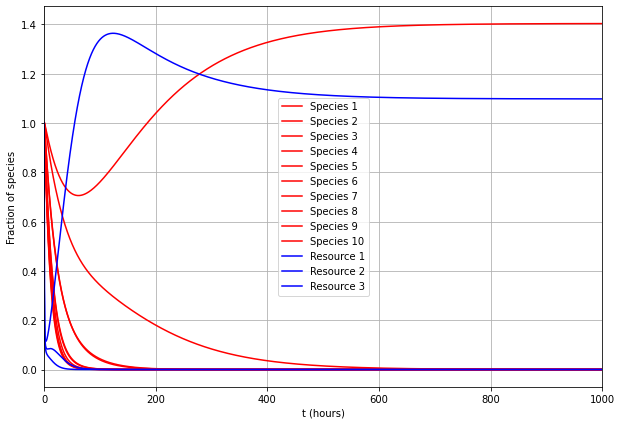

In [3]:
ns = 10
nr = 3
crm_solver(ns, nr, seed = 1234, plot = True, random_seed = True)

#### Metabolic trade-off

Thus, this model respects the intuitive expectation of competitive exclusion, which however does not agree with data. Then, we need to make some further generalizations. There could be one simple possibility: metabolic trade-off. We start with the C-R equations:

$$
\begin{align*}
\dot{m_{\sigma}} = m_{\sigma}\left(\sum_{i=1}^{N_R}v_{i}\alpha_{\sigma i}r_i(c_{i}) - q_{\sigma}\right) & \ \ \ \  q_{\sigma} \ll 1 \Rightarrow q_{\sigma} \approx q \\
\dot{c_i} = s_i - \sum_{\sigma = 1}^{N_S} m_{\sigma} \alpha_{\sigma i}r_i(c_i) & \\
\end{align*}
$$

The idea is that to consume resources, a species must produce enzymes and metabolites, meaning that it must spend some energy $w_i$ for assimilating a resource $i$. This expense is limited by a total $\textbf{energy budget}$ E, which we can assume (for simplicity) to be the same for all species $E_{\sigma} \equiv E \ \ \forall \sigma = 1, \dots , N_S$. So we can add the following constraint:
$$
\sum_{i}w_i\alpha_{\sigma i} = E
$$
That at the steady state becomes:
$$
\sum_{i = 1}^{N_R}v_i\alpha_{\sigma i}r_i^* = \delta \Rightarrow r_i^* = \frac{\delta}{E}\frac{w_i}{v_i}
$$
Substituting in the resource equation we get:
$$
r_i^* = \frac{s_i}{\sum_{\sigma}m_{\sigma}^*\alpha_{\sigma i}} \Rightarrow \sum_{\sigma}{m_{\sigma}^*\alpha_{\sigma i}} = \frac{E}{\delta}\frac{s_i v_i}{w_i}
$$ 
If we insert all in the population equation:
$$
\sum_{\sigma}{\dot{m_{\sigma}}} = \sum_{\sigma}\sum_{i}m_{\sigma}v_i \alpha_{\sigma i} r_i - \delta \sum_{\sigma}m_{\sigma} \ \ \ \ N \equiv \sum_{\sigma}m_{\sigma} \\
\dot{N} = \sum_{i}\underbrace{\sum_{\sigma}m_{\sigma}\alpha_{\sigma i} r_i}_{s_i} v_i - \delta N = \underbrace{\sum_{i}\overbrace{s_i v_i}^{\bar{s_i}}}_{\bar{s}} - \delta N \\
\dot{N} = \bar{s} - \delta N \Rightarrow N^* = \frac{\bar{s}}{\delta}
$$

and if we re parametrize:
$$
x_{\sigma} = \frac{m_{\sigma}}{N} \ \ \ \bar{\alpha_{\sigma i}} = \alpha_{\sigma i} \frac{w_i}{E} \ \ \ \hat{s_i}
= \frac{\bar{s_i}}{\bar{s}}
$$

so that the following sums are normalized:
$$
\sum_{\sigma = 1}^{N_S}x_{\sigma} = 1 \ \ \ \sum_{i = 1}^{N_R}\bar{\alpha_{\sigma i}} = 1 \ \ \ \sum_{i = 1}^{N_R}\hat{s_i}= 1
$$
we have then $\sum_{\sigma}x^*_{\sigma}\bar{\alpha_{\sigma i}} = \hat{s_i}$

It can be translated geometrically in this way: 
if we consider a system with 3 resources, then the vectors $\vec{\bar{\alpha_{\sigma}}}$ lie in a triangle, and depending on their position specify which resources can be used by species $\sigma$.
Then, coexistence at stationarity will be possible only if $\sum_{\sigma}x_{\sigma}^*\bar{\alpha_{\sigma i}} = \hat{s_i}$. Geometrically, this means that $\hat{s}$ should be inside the convex hull given by $\sum_{\sigma}x_{\sigma}^*\bar{\alpha_{\sigma i}}$.

Given a point $\vec{r}$ in a triangle's plane one can obtain the baricentric coordinates $\lambda_1,\lambda_2,\lambda_3$ from the cartesian coordinates $(x,y)$ or viceversa. 

We can write the cartesian coordinates of a generic point $\vec{r}$ in terms of the cartesian components of the triangle vertices $\vec{r_1},\vec{r_2},\vec{r_3}$ where $\vec{r_i}=(x_i,y_i)$ and in terms of the baricentric coordinates of $\vec{r}$ as:

$$
x = \lambda_1 x_1 + \lambda_2 x_2 + \lambda_3 x_3 \\
y = \lambda_1 y_1 + \lambda_2 y_2 + \lambda_3 y_3
$$
That is, the Cartesian coordinates of any point are a weighted average of the Cartesian coordinates of the triangle's vertices, with the weights being the point's barycentric coordinates summing to unity.

In [4]:
def bc2xy(l):
    '''
    The function takes as input the baricentric coordinates of a point inside the triangle and transforms them into 
    their cartesian version 
    input: a vector l of lambda1,lambda2,lambda3 
    output: x,y
    '''
    corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
    x = np.dot(l,corners.T[0]) # corners.T[0] are just the x components of the three vertices 
    y = np.dot(l,corners.T[1]) # corners.T[1] are just the y components of the three vertices
    return x,y

In [9]:
np.random.seed(1234)
ns = 10
nr = 3
dictionary_solution = crm_solver(ns = ns, nr = nr, seed = 1234, random_seed=True, constraint = True)
# this variable is a dictionary containing all informations about the numerical simulation results both for consumers
# population and resources 

In [77]:
# plotting the simplex with the vectors for the conditions of coexistance and saving each frame in order to 
# create a gif image
np.random.seed(1234)
w_i = np.random.uniform(0,1,nr)
E = np.sum(w_i)

for i in range(0, 40):
    plt.ioff()
    s_i = np.dot(dictionary_solution['species'][i],dictionary_solution['alpha']) * dictionary_solution['resources'][i]
    s_hat = (dictionary_solution['v']*s_i)/np.sum(dictionary_solution['v']*s_i)
    alpha_hat = dictionary_solution['alpha']*(w_i/E)
    
    fig = plt.figure(figsize=(8,7))
    plt.triplot(trimesh)
    for j in range(ns):
        plt.plot(*bc2xy(alpha_hat[j]), 'bo')
    plt.plot(*bc2xy(alpha_hat[j]), 'bo', label = 'Rescaled metabolic strategies')
        # print(bc2xy(alpha_hat[i]))
    points = np.array([bc2xy(alpha_hat[j]) for j in range(ns)])
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
    plt.plot(*bc2xy(s_hat), 'r*', markersize = 15, label = 'Rescaled supply rates')
    plt.text(0.15,0.45, '$\\bar{\\alpha}_1$', fontsize = 22)
    plt.text(0.5,-0.09, '$\\bar{\\alpha}_2$', fontsize = 22)
    plt.text(0.75,0.45, '$\\bar{\\alpha}_3$', fontsize = 22)
    plt.text(*corners[0]-0.1, '$i = 1$', fontsize = 22)
    plt.text(*corners[1]-0.1, '$i = 2$', fontsize = 22)
    plt.text(*(corners[2]-[0.12,0]), '$i = 3$', fontsize = 22)

    plt.axis('off')
    # plt.grid()
    params = {'legend.fontsize': 11,
              'legend.handlelength': 1}
    plt.rcParams.update(params)
    plt.legend(loc = 'upper right')
    plt.savefig('./gif/simple_frame{}'.format(i))
    plt.close(fig)

In [ ]:
# plotting the simplex with the vectors for the conditions of coexistance

np.random.seed(1234)
w_i = np.random.uniform(0,1,nr)
E = np.sum(w_i)
s_i = np.dot(dictionary_solution['species'][-1],dictionary_solution['alpha']) * dictionary_solution['resources'][-1]
s_hat = (dictionary_solution['v']*s_i)/np.sum(dictionary_solution['v']*s_i)
alpha_hat = dictionary_solution['alpha']*(w_i/E)

# devo scalare i vertici del triangolo ma non so 
# bc_corners = np.array([[1,0,0],[0,1,0],[0,0,1]])*(w_i/E)
# bc_corners1 = []
# for r in range(nr):
#     bc_corners1.append(bc2xy(bc_corners[r]))
# bc_corners1 = np.array(bc_corners1)

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=0)
fig = plt.figure(figsize=(8,7))
plt.triplot(trimesh)
plt.text(0.15,0.45, '$\\bar{\\alpha}_1$', fontsize = 22)
plt.text(0.5,-0.09, '$\\bar{\\alpha}_2$', fontsize = 22)
plt.text(0.75,0.45, '$\\bar{\\alpha}_3$', fontsize = 22)
plt.text(*corners[0]-0.1, '$i = 1$', fontsize = 22)
plt.text(*corners[1]-0.1, '$i = 2$', fontsize = 22)
plt.text(*(corners[2]-[0.12,0]), '$i = 3$', fontsize = 22)
for j in range(ns):
    plt.plot(*bc2xy(alpha_hat[j]), 'bo')
plt.plot(*bc2xy(alpha_hat[j]), 'bo', label = 'Rescaled meetabolic strategies')
    # print(bc2xy(alpha_hat[i]))
points = np.array([bc2xy(alpha_hat[j]) for j in range(ns)])
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.plot(*bc2xy(s_hat), 'r*', markersize = 15, label = 'Rescaled supply rates')
params = {'legend.fontsize': 11,
        'legend.handlelength': 1}
plt.rcParams.update(params)
plt.legend(loc = 'upper right')
plt.axis('off')
plt.show()

In [ ]:
file_list = glob.glob('./gif/*.png') # Get all the pngs in the gif directory

fig, ax = plt.subplots()
ax.axis('off')
im = []
for i in range(len(file_list)):
    imm = ax.imshow(plt.imread(file_list[i]), animated=True)
    im.append([imm])
ani = animation.ArtistAnimation(fig, im, interval=1, blit=True,
                                repeat_delay=1000)

ani.save("crtriangle1.gif")

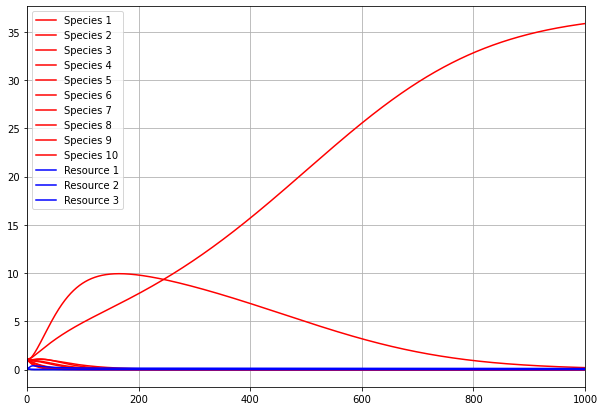

In [ ]:
crm_solver(ns, nr, plot = True, random_seed=True, constraint=True, xlimend=1000)

##### Example considering the first 100 frames of the evolution dynamics

<img src="./crtriangle4.gif" width="500" eheallign="center">

As we can see from the picture in a simulation with three resources and four species the CEP is respected even if we introduced a constraint about the total energy that is needed for producing enzymes that are able for each species to metabolize the resources. Enzymes in this way cannot be produced indefinitely but are limited.

#### The consumer-proteome-resource model

Here, we incorporate proteome allocation constraints into consumer-resource models and show that proteome fractions allocated to the uptake of different resources must vary with time as resource concentrations vary.
In order to write the consumer-proteome-resource model we introduce the following assumptions: 
1. The uptake rate $J_{\sigma i}$ is proportional to the proteome fraction $\varphi_{\sigma i} = \varphi_{\sigma i}^P$ allocated by species $\sigma$ for the uptake and metabolization of resource $i$:  $J_{\sigma i} = \xi_i r_i(c_i) \varphi_{\sigma i}$; 
2. Each resource contributes to the growth of species $\sigma$ through a term $g_{\sigma}^{(i)}$  proportional to the uptake rate $J_{\sigma i}$, so that the total growth rate $g_{\sigma}$ of species $\sigma$ can be written as the sum of all the terms $g_{\sigma}^{(i)}$. Where in particular $g_{\sigma} = \sum_{i = 1}^{N_R}\frac{k_i^n}{\rho_{\sigma}}r_i(c_i)  \varphi_{\sigma i}$

$$
\dot{m_{\sigma}} = m_{\sigma}\left(\sum_{i = 1}^{N_R} \frac{k_i^n}{\rho_{\sigma}} r_i(c_i)\varphi_{\sigma i} - q_{\sigma}\right) \\
\dot{c_i} = s_i - \xi_i r_i(c_i)\sum_{\sigma = 1}^{N_S} \varphi_{\sigma i} m_{\sigma}  \\ 
\sum_{i = 1}^{N_R}\varphi_{\sigma i}\left(1 + \frac{k_i^n}{k_{\sigma}^t} r_i(c_i)\right) = \Phi_{\sigma} 
$$

The parameter $\xi_i$ can be interpreted as the maximum catalytic rate of the enzyme used to metabolize resource $i$, and $\Phi_{\sigma}$ is the total proteome fraction allocated by species $\sigma$ for metabolism and biomass synthesis, which is fixed. For a species growing on a single resource, the parameters that are most easily measured experimentally are the perbiomass resource uptake rate $\xi r(c) \varphi_{\sigma}$ and the yield (expressed as biomass per grams of resource), which in our framework is given by $Y = k^n / \rho \xi$.

We can notice easily that the fractions $\varphi_{\sigma i}$ cannot be fixed variable but must change w.r.t the resource concentration $c_i$. This can be seen by considering a system with one resource, for which the finiteness of the proteome reads:

$$
\varphi_{\sigma}\left(1 + \frac{k^n}{k_{\sigma}^t} r(c)\right) = \Phi_{\sigma}
$$

And thus $\varphi_{\sigma}$ must change with the resource concentration. In particular it must decrease as the resource concentration increases (recall that $r_c$ is a monotonically increasing function). This occurs because if, for example, the available resource becomes scarce, cells will need to produce more catabolic proteins to meet their energy requirements. Thus, it is necessary to introduce some form of dynamics on the proteome fractions that each species allocates for nutrient uptake and metabolization. This observation should not come as a surprise, given that microbes are known to adapt their proteome allocation and metabolic strategies according to which resources are available.
Our approach is to require that all $\varphi_{\sigma i}$ evolve dynamically with a characteristic timescale to maximize the
instantaneous growth rate of species $\sigma$ in an adaptive process, while ensuring that the proteome finiteness constraint is satisfied at all times. 

Let's call $\vec{c} = (c_1, \dots, c_{N_R})$ the vector of resource concentrations and define

$$
F_{\sigma}(\vec{\varphi_{\sigma}}, \vec{c}) := \sum_{i = 1}^{N_R}\varphi_{\sigma i}\left(1 + \frac{k_i^n}{k_{\sigma}^t} r_i(c_i)\right) - \Phi_{\sigma}
$$

So that the finiteness of the proteome becomes $F_{\sigma}(\vec{\varphi_{\sigma}}, \vec{c}) = 0$. Since this constraint must be valid at every instant, any equation for $\varphi_{\sigma}$ must satisfy

$$
\dot{F_{\sigma}}(\vec{\varphi_{\sigma}}, \vec{c}) \equiv \dot{\vec{\varphi_{\sigma}}} \cdot \vec{\nabla}_{\sigma}F_{\sigma} + \dot{\vec{c}} \cdot \vec{\nabla}_{c}F_{\sigma} = 0
$$

Microbes are able to switch between nutrients when cultured in mediums containing more than one resource. For this reason, we can implement an adaptive approach and ask that $\vec{\varphi_{\sigma}}$ evolves in time so that the growth rate $g_{\sigma}$ of species $\sigma$ is maximized respecting the constraint $\dot{F_{\sigma}}(\vec{\varphi_{\sigma}}, \vec{c}) = 0$. In this case the evolution equation for $\vec{\varphi_{\sigma}}$ becomes:

$$
\dot{\vec{\varphi_{\sigma}}} = \frac{1}{\tau_{\sigma}} \vec{\nabla}_{\varphi} g_{\sigma} - \frac{\vec{\nabla}_{\varphi} F_{\sigma}}{(\vec{\nabla}_{\varphi} F_{\sigma})^2} \left( \frac{1}{\tau_{\sigma}} \vec{\nabla}_{\varphi} g_{\sigma} \cdot \vec{\nabla}_{\varphi} F_{\sigma} + \dot{\vec{c}} \cdot \vec{\nabla}_{c} F_{\sigma} \right)
$$

Where $\tau_{\sigma}$ is the characteristic timescale over which $\vec{\varphi_{\sigma}}$ changes. In order to make the ${\varphi}_{\sigma i}$ positive during the time of the simulation the above written equation must be changed with the help of an auxiliary positive function $\psi_{\sigma i} \ge 0 \ \ \forall t$:

$$
\dot{\varphi_{\sigma i}} = \varphi_{\sigma i} \left[\frac{k_i^n r_i(c_i)}{\rho_{\sigma} \tau_{\sigma}} - \frac{(1 + \frac{k_i^n}{k_{\sigma}^t} r_i(c_i))}{\sum_{k = 1}^{N_R} \varphi_{\sigma k}(1 + \frac{k_k^n}{k_{\sigma}^t} r_k(c_k))^2} \sum_{j = 1}^{N_R} \varphi_{\sigma j} \left( \frac{k_j^n r_j(c_j)}{\rho_{\sigma} \tau_{\sigma}} \left(1 + \frac{k_j^n}{k_{\sigma}^t} r_j(c_j)\right) + \frac{k_j^n}{k_{\sigma}^t} r_j(c_j) \frac{K_j}{(c_j + K_j)^2} \dot{c_j} \right) \right]
$$

In order to simplify more the equation we could introduce $\eta_{\sigma i} = k_i^n/\rho_{\sigma}$ and $\gamma_{\sigma i} = k_i^n/k_{\sigma}^t$

In this way we are going to use just a system of three first order differential equations given by:

$$
\dot{m_{\sigma}} = m_{\sigma}\left(\sum_{i = 1}^{N_R} \eta_{\sigma i} r_i(c_i)\varphi_{\sigma i} - q_{\sigma}\right) \\
\dot{c_i} = s_i - \xi_i r_i(c_i)\sum_{\sigma = 1}^{N_S} \varphi_{\sigma i} m_{\sigma} \\
\dot{\varphi_{\sigma i}} = \varphi_{\sigma i} \left[\frac{\eta_{\sigma i} r_i(c_i)}{\tau_{\sigma}} - \frac{(1 + \gamma_{\sigma i} r_i(c_i))}{\sum_{k = 1}^{N_R} \varphi_{\sigma k}(1 + \gamma_{\sigma k} r_k(c_k))^2} \sum_{j = 1}^{N_R} \varphi_{\sigma j} \left( \frac{\eta_{\sigma j} r_j(c_j)}{\tau_{\sigma}} \left(1 + \gamma_{\sigma j} r_j(c_j)\right) + \gamma_{\sigma j} r_j(c_j) \frac{K_j}{(c_j + K_j)^2} \dot{c_j} \right) \right]
$$

In [5]:
# let's first understand which are the parameters of this simulation 
# supplememtary informations clarifies the choice of params

def cpr(N = 100000, 
        dt = 0.001, 
        ns = 10,
        nr = 3,
        x = 1,
        y = 1,
        seed = 123,
        random_seed = False,
        q = np.random.uniform(0.01,0.05, size = ns), 
        rho = np.random.uniform(0.05,0.09,size = ns), 
        s = np.random.uniform(500,2000,nr), 
        xi = np.random.uniform(100,150,nr),  
        kn = np.random.uniform(1,5,size = nr), 
        kt = np.random.uniform(0.1,0.5,size = ns),  
        K = np.random.uniform(5,10, size = nr),
        tau = np.random.uniform(1000,5000, size = ns),
        Phi = np.random.uniform(0.045,0.055,size = ns),
        m0 = np.random.uniform(0.5,5,size = ns),
        c0 = np.random.uniform(500, 1500, size = nr),
        accuracy = 1e-3):

        '''
        Parameters are chosen randomly in a uniform distribution of some given values reported in literature. 
        The function returns the dynamic simulation for species and resources of the consumer-proteome-resource model
        with all the paramters in a dictionary that made the algorithm work.
        Random_seed = True sets resproducibility on the simulation for certain values of parameters
        '''
        if random_seed == True:
            np.random.seed(seed) 

        t = np.linspace(0, N*dt, N + 1)
        s = s * x
        tau = tau * y
        
        def eta_sigmai(ns,nr):
            eta = np.zeros((ns,nr), dtype = np.longfloat)
            for sigma in range(ns):
                for i in range(nr):
                    eta[sigma,i] = kn[i]/rho[sigma]
            return eta

        def r_i(c,K):
            return c/(c+K)

        def gamma_sigmai(ns,nr):
            gamma = np.zeros((ns,nr), dtype = np.longfloat)
            for sigma in range(ns):
                for i in range(nr):
                    gamma[sigma,i] = kn[i]/kt[sigma]
            return gamma

        # let's define some initial conditions
        # initialization of phi as phi0: they are drawn randomly so that they satisfy sum_i^N_R phi_sigma,i(...) = Phi_sigma
        phi0 = np.random.uniform(0,1, size = (ns,nr))

        scale = (np.sum(phi0,axis = 1) + np.dot(gamma_sigmai(ns,nr)*phi0, r_i(c0,K)))/Phi
        phi0 = phi0/scale[:,None]

        sol = np.zeros((N + 1, ns + nr), dtype=np.longfloat)
        phi = np.zeros((N + 1, ns, nr), dtype=np.longfloat)
        eta = eta_sigmai(ns,nr)
        gamma = gamma_sigmai(ns,nr)
        sol[0,:ns] = m0
        sol[0,ns:] = c0
        phi[0] = phi0
 
        for n in range(N):
            sol[n+1,:ns] = sol[n,:ns] + dt*sol[n,:ns]*(np.dot(eta*phi[n], r_i(sol[n,ns:],K)) - q)
            sol[n+1,ns:] = sol[n,ns:] + dt*(s - xi*r_i(sol[n,ns:],K)*np.dot(sol[n,:ns],phi[n]))
            # if np.mean(np.abs(sol[n+1,ns:] - sol[n,ns:])) < accuracy:
            #     dt = dt
            # else: 
            #     dt = dt/2
            if np.any(sol[n+1,ns:] < 0):
                print('negative res iteration number',n+1)
                break
            tmp = phi[n]
            first = (eta*r_i(sol[n,ns:],K))/tau.T[:,None] 
            # in order to avoid division by zero we can introduce this exception that runs when the denominator is actually zero
            if np.any((tmp*(1 + gamma*r_i(sol[n,ns:],K)*r_i(sol[n,ns:],K))) == 0):
                second = 0
            else : 
                second = (1 + gamma*r_i(sol[n,ns:],K))/(tmp*(1 + gamma*r_i(sol[n,ns:],K)*(1 + gamma*r_i(sol[n,ns:],K))))
            # second = (1 + gamma*r_i(sol[n,ns:],K))/(tmp*(1 + gamma*r_i(sol[n,ns:],K)*(1 + gamma*r_i(sol[n,ns:],K))))
            third1 = ((eta*r_i(sol[n,ns:],K))/tau.T[:,None])*(1 + gamma*r_i(sol[n,ns:],K))
            third2 = ((K/(sol[n,ns:] + K))/(sol[n,ns:] + K))
            # third3 =  gamma*(s - xi*r_i(sol[n,ns:],K)*np.dot(sol[n,:ns],phi[n]))
            third3 = gamma*(s - xi*r_i(sol[n,ns:],K)*np.dot(sol[n,:ns],phi[n]))*r_i(sol[n,ns:],K)
            if np.any(third2 == np.NaN) : 
                print('NaN detected')
                break
            third4 = (third2*third3)
            third = third1 + third4
            # third = ((eta*r_i(sol[n,ns:],K))/tau.T[:,None])*(1 + gamma*r_i(sol[n,ns:],K)) + gamma*(K/((sol[n,ns:] + K)**2))*((sol[n+1,ns:] - sol[n,ns:])/dt)
            phi[n+1] = phi[n] + dt*phi[n]*(first - second*((third*phi[n]).sum(axis = 1)[:,None]))
            # phi[n+1][phi[n+1] < 0] = phi[n][phi[n+1] < 0]
            if np.any(phi[n+1] < 0):
            #     print('negative metabolic strategies')
            #     break
                # phi[n+1][phi[n+1] < 0] = phi[n][phi[n+1] < 0]
                phi[n+1][phi[n+1] < 0] = 0

            
        return {'sol':sol, 't':t, 'phi':phi, 'q':q, 'rho':rho, 's':s, 'xi':xi, 'kn':kn, 'kt':kt, 'K':K, 'tau':tau, 'Phi':Phi, 'm0':m0, 'c0':c0}

In [ ]:
N = 100000
dt = 0.001
t = np.linspace(0, N*dt, N + 1)

consumers = cpr(N = N,
                dt = dt,
                ns = 10,
                nr = 3,
                q = np.random.uniform(0.1,0.01,ns), 
                rho = np.random.uniform(0.06,0.08,size = ns), 
                s = np.random.uniform(500,1000,nr), 
                xi = np.random.uniform(100,150,nr),  
                kn = np.random.uniform(0.5,1,size = nr), 
                kt = np.random.uniform(0.1,0.5,size = ns),  
                K = np.random.uniform(5,10, size = nr),
                tau = np.random.uniform(1000,5000, size = ns),
                Phi = np.random.uniform(0.045,0.055,size = ns),
                m0 = np.random.uniform(1,5,size = ns),
                c0 = np.random.uniform(500, 1500, size = nr))

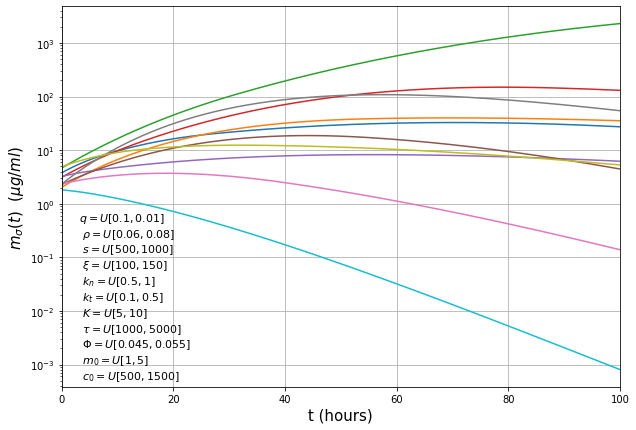

In [156]:
plt.figure(figsize = (10,7))
for i in range(ns):
    plt.plot(t,consumers['sol'][:,i])
    plt.xlim(0,100)
    plt.yscale('log')
plt.annotate('$q = U[0.1,0.01]$ \n $\\rho = U[0.06,0.08]$ \n $s = U[500,1000]$ \n $\\xi = U[100,150]$ \n $k_n = U[0.5,1]$ \n $k_t = U[0.1,0.5]$ \n $K = U[5,10]$ \n $\\tau = U[1000,5000]$ \n $\\Phi = U[0.045,0.055]$ \n $m_0 = U[1,5]$ \n $c_0 = U[500,1500]$', xy=(0.03, 0.02), xycoords='axes fraction', size = 11)
plt.ylabel('$m_{\\sigma}(t) $  $(\\mu g / ml)$', size = 15)
plt.xlabel('t (hours)', size = 15)
plt.grid()
plt.show()

In [148]:
N = 100000
dt = 0.001
t = np.linspace(0, N*dt, N + 1)

consumers1 =cpr(N = N,
                dt = dt,
                ns = 10,
                nr = 3,
                random_seed=True,
                seed=123,
                q = np.random.uniform(0.01,0.02,ns), 
                rho = np.random.uniform(0.06,0.08,size = ns), 
                s = np.random.uniform(500,1000,nr), 
                xi = np.random.uniform(100,150,nr),  
                kn = np.random.uniform(0.5,1,size = nr), 
                kt = np.random.uniform(0.1,0.5,size = ns),  
                K = np.random.uniform(5,10, size = nr),
                tau = np.random.uniform(1000,5000, size = ns),
                Phi = np.random.uniform(0.045,0.055,size = ns),
                m0 = np.random.uniform(1,5,size = ns),
                c0 = np.random.uniform(500, 1500, size = nr))


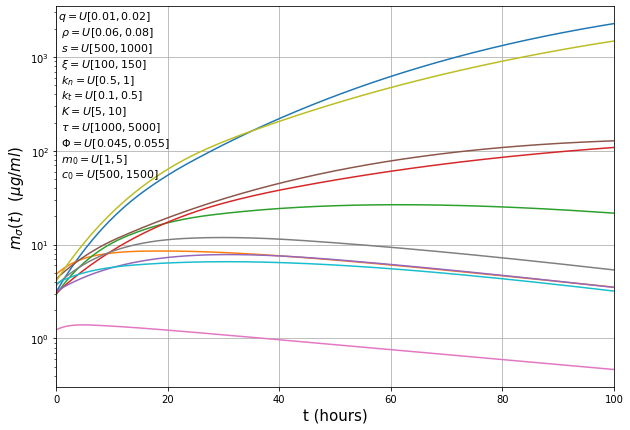

In [155]:
plt.figure(figsize = (10,7))
for i in range(ns):
    plt.plot(t,consumers1['sol'][:,i])
    plt.xlim(0,100)
    plt.yscale('log')
plt.annotate('$q = U[0.01,0.02]$ \n $\\rho = U[0.06,0.08]$ \n $s = U[500,1000]$ \n $\\xi = U[100,150]$ \n $k_n = U[0.5,1]$ \n $k_t = U[0.1,0.5]$ \n $K = U[5,10]$ \n $\\tau = U[1000,5000]$ \n $\\Phi = U[0.045,0.055]$ \n $m_0 = U[1,5]$ \n $c_0 = U[500,1500]$', xy=(0.003, 0.55), xycoords='axes fraction', size = 11)
plt.ylabel('$m_{\\sigma}(t) $  $(\\mu g / ml)$', size = 15)
plt.xlabel('t (hours)', size = 15)
plt.grid()
plt.show()

In [ ]:
N = 1000000
dt = 0.001
t = np.linspace(0, N*dt, N + 1)

consumers2 =cpr(N = N,
                dt = dt,
                ns = 10,
                nr = 3,
                q = np.random.uniform(0.001,0.001,ns), 
                rho = np.random.uniform(0.6,0.8,size = ns), 
                s = np.random.uniform(500,2000,nr), 
                xi = np.random.uniform(100,1500,nr),  
                kn = np.random.uniform(0.2,0.5,size = nr), 
                kt = np.random.uniform(1,4,size = ns),  
                K = np.random.uniform(5000,10000, size = nr),
                tau = np.random.uniform(10,50, size = ns),
                Phi = np.random.uniform(0.45,0.55,size = ns),
                m0 = np.random.uniform(1,5,size = ns),
                c0 = np.random.uniform(5000, 15000, size = nr))['sol']

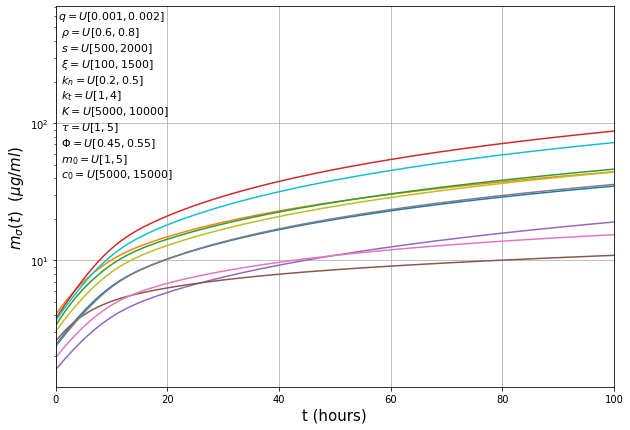

In [159]:
plt.figure(figsize = (10,7))
for i in range(ns):
    plt.plot(t,consumers2[:,i])
    plt.xlim(0,100)
    plt.yscale('log')
plt.annotate('$q = U[0.001,0.002]$ \n $\\rho = U[0.6,0.8]$ \n $s = U[500,2000]$ \n $\\xi = U[100,1500]$ \n $k_n = U[0.2,0.5]$ \n $k_t = U[1,4]$ \n $K = U[5000,10000]$ \n $\\tau = U[1,5]$ \n $\\Phi = U[0.45,0.55]$ \n $m_0 = U[1,5]$ \n $c_0 = U[5000,15000]$', xy=(0.003, 0.55), xycoords='axes fraction', size = 11)
plt.ylabel('$m_{\\sigma}(t) $  $(\\mu g / ml)$', size = 15)
plt.xlabel('t (hours)', size = 15)
plt.grid()
plt.show()

##### Conditions for coexistence 
We are looking for stationary solutions where all species have non null biomass densities. Doing so yields two necessary conditions for the coexistance of all species.

The first condition that holds when there are more species than resources, $N_S > N_R$ (we are going to analyze only this case), is that the mantainance cost $q_{\sigma}$ of species $\sigma$ must be proportional to the total proteome fraction allocated for metabolism and growth, i.e $q_{\sigma} \propto \Phi_{\sigma}$, with a species dependent proportionality constant. This requirement is biologically reasonable, since allocating a larger fraction of the proteome to such functions requires additional energy to synthesize the necessary proteins.

The second condition can be interpreted as follows using a graphical representation that have been already used in the previous model. A system with $N_R$ resources can be represented on an $(N_R − 1)$–dimensional simplex, where each vertex corresponds to one of the available resources; considering for example the case $N_R = 3$, the system can be represented on a triangle (i.e., a bi-dimensional simplex). On this simplex one can draw the vectors $\vec{\hat{s}}$ and $\vec{\hat{\varphi_{\sigma}^*}}$, whose components are appropriately rescaled versions of (respectively) the resource supply rates $s_i$ and the stationary proteome fractions $\vec{\varphi_{\sigma}^*}$. The second condition prescribes that $\vec{\hat{s}}$ must belong to the convex hull of the vectors $\vec{\hat{\varphi_{\sigma}^*}}$.

This condition involves the stationary proteome fractions and thus the community has the opportunity to coexist even if the rescaled resource supply rate vector is not within the convex hull of the proteome fractions at the start of the
temporal evolution.

Let's write analitically these conditions in order to reproduce them:

First condition can be written as 

$$
q_{\sigma} = \frac{{\Phi_{\sigma}}}{\rho_{\sigma}(\Theta + 1/k_{\sigma}^t)}
$$

while the second is just

$$
\hat{s_i} = \sum_{\sigma=1}^{N_S}z_{\sigma}\hat{\varphi}_{\sigma i}
$$

where $\hat{s}_i = \frac{s_i k_i^n/\xi_i}{\sum_{j = 1}^{N_R}s_j k_j^n/\xi_j}$, $z_{\sigma} = \frac{m_{\sigma}^*\rho_{\sigma}q_{\sigma}}{\sum_{\lambda}m_{\lambda}^*\rho_{\lambda}q_{\lambda}}$ and $\hat{\varphi}_{\sigma i} = \frac{\varphi_{\sigma i}}{\sum_{j = 1}^{N_R}\varphi_{\sigma j}}$

In [6]:
def repr(dic):
    fig, ax = plt.subplots(1,2, figsize = (20,7))
    for i in range(ns):
        ax[0].plot(dic['t'], dic['sol'][:,i])
        # ax[0].set_xlim(0,100)
        ax[0].set_yscale('log')
    # ax[0].annotate('$q = U[0.001,0.002]$ \n $\\rho = U[0.6,0.8]$ \n $s = U[500,2000]$ \n $\\xi = U[100,1500]$ \n $k_n = U[0.2,0.5]$ \n $k_t = U[1,4]$ \n $K = U[5000,10000]$ \n $\\tau = U[1,5]$ \n $\\Phi = U[0.45,0.55]$ \n $m_0 = U[1,5]$ \n $c_0 = U[5000,15000]$', xy=(0.003, 0.55), xycoords='axes fraction', size = 11)
    
    ax[0].set_ylabel('$m_{\\sigma}(t) $  $(\\mu g / ml)$', size = 15)
    ax[0].set_xlabel('t (hours)', size = 15)
    ax[0].grid()

    Phicpr1 = dic['Phi']
    rhocpr1 = dic['rho']
    ktcpr1 = dic['kt']
    qcpr1 = dic['q']
    if np.all(Phicpr1/(rhocpr1*(5 + 1/ktcpr1)) == qcpr1): 
        print('First condition for coexistence is valid')
    if np.any(Phicpr1/(rhocpr1*(5 + 1/ktcpr1)) == qcpr1):
        print('First condition for coexistence is valid for some species')
    kncpr1 = dic['kn']
    xicpr1 = dic['xi']
    scpr1 = dic['s']
    phicpr1 = dic['phi']
    phicpr1_hat = ((phicpr1[-1]/phicpr1[-1].sum(axis = 1)[:,None])) #+ 0.5)*0.5 # attenzione a questo pezzetto che serve per l'ultimo grafico
    phicpr1_hat_in = phicpr1[0]/phicpr1[0].sum(axis = 1)[:,None]
    scpr1_hat = (scpr1*kncpr1/xicpr1/((scpr1*kncpr1/xicpr1).sum()))

    corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
    triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=0)

    ax[1].triplot(trimesh)
    ax[1].text(0.15,0.45, '$\\hat{\\varphi}_1$', fontsize = 22)
    ax[1].text(0.5,-0.09, '$\\hat{\\varphi}_2$', fontsize = 22)
    ax[1].text(0.75,0.45, '$\\hat{\\varphi}_3$', fontsize = 22)

    for j in range(ns):
        ax[1].plot(*bc2xy(phicpr1_hat[j]), 'bo')
        ax[1].plot(*bc2xy(phicpr1_hat_in[j]), 'go')
        # print(bc2xy(alpha_hat[i]))
    ax[1].plot(*bc2xy(phicpr1_hat[j]), 'bo', markersize = 4, label = 'Stationary metabolic strategies')
    ax[1].plot(*bc2xy(phicpr1_hat_in[j]), 'go', markersize = 4, label = 'Initial metabolic strategies')
    points = np.array([bc2xy(phicpr1_hat[j]) for j in range(ns)])
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        ax[1].plot(points[simplex, 0], points[simplex, 1], 'b-', )
    points1 = np.array([bc2xy(phicpr1_hat_in[j]) for j in range(ns)])
    hull1 = ConvexHull(points1)
    for simplex1 in hull1.simplices:
        ax[1].plot(points1[simplex1, 0], points1[simplex1, 1], 'g-')

    ax[1].plot(*bc2xy(scpr1_hat), 'r*', markersize = 15, label = 'Rescaled supply rates')
    ax[1].text(*corners[0]-0.1, '$i = 1$', fontsize = 22)
    ax[1].text(*corners[1]-0.1, '$i = 2$', fontsize = 22)
    ax[1].text(*(corners[2]-[0.12,0]), '$i = 3$', fontsize = 22)
    ax[1].axis('off')

    plt.legend()
    plt.show()


In [167]:
dictionary_solutioncpr1 = cpr(  N = 100000,
                                dt = 0.001,
                                ns = 10,
                                nr = 3,
                                random_seed=True,
                                seed = 1234,
                                q = np.random.uniform(0.1,0.01,ns), 
                                rho = np.random.uniform(0.5,0.9,size = ns), 
                                s = np.random.uniform(500,2000,nr), 
                                xi = np.random.uniform(1000,15000,nr),  
                                kn = np.random.uniform(5,10,size = nr), 
                                kt = np.random.uniform(1,5,size = ns),  
                                K = np.random.uniform(500,1000, size = nr),
                                tau = np.random.uniform(10000,50000, size = ns),
                                Phi = np.random.uniform(0.45,0.55,size = ns),
                                m0 = np.random.uniform(1,5,size = ns),
                                c0 = np.random.uniform(0.5, 0.15, size = nr))

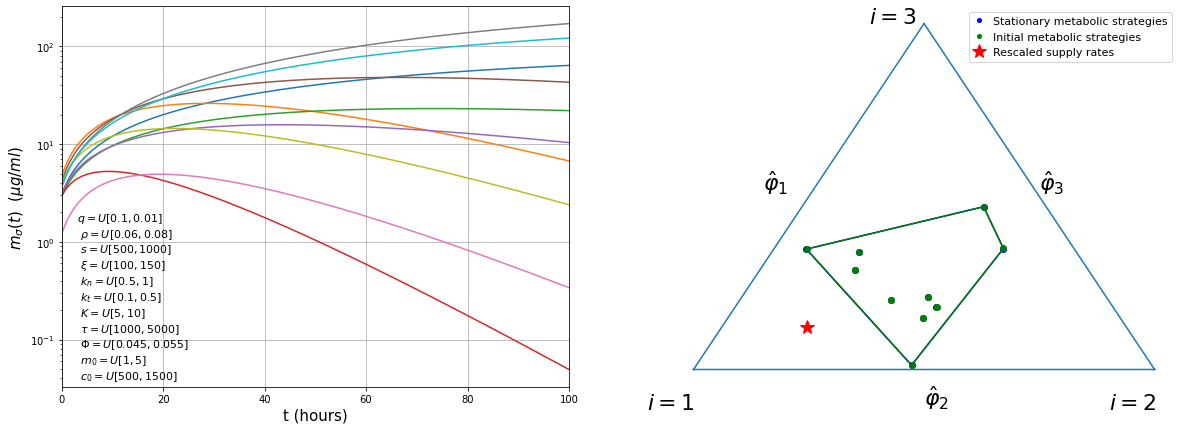

In [174]:
repr(dictionary_solutioncpr1)

In [211]:
dictionary_solutioncpr2 = cpr(  N = 100000,
                                dt = 0.001,
                                ns = 10,
                                nr = 3,
                                random_seed=True,
                                seed = 1233,
                                q = np.random.uniform(0.01,0.02,ns), 
                                rho = np.random.uniform(0.6,0.8,size = ns), 
                                s = np.random.uniform(50,100,nr), 
                                xi = np.random.uniform(1000,1500,nr),  
                                kn = np.random.uniform(5,10,size = nr), 
                                kt = np.random.uniform(1,5,size = ns),  
                                K = np.random.uniform(50,100, size = nr),
                                tau = np.random.uniform(10000,50000, size = ns),
                                Phi = np.random.uniform(0.45,0.55,size = ns),
                                m0 = np.random.uniform(1,5,size = ns),
                                c0 = np.random.uniform(5, 15, size = nr))

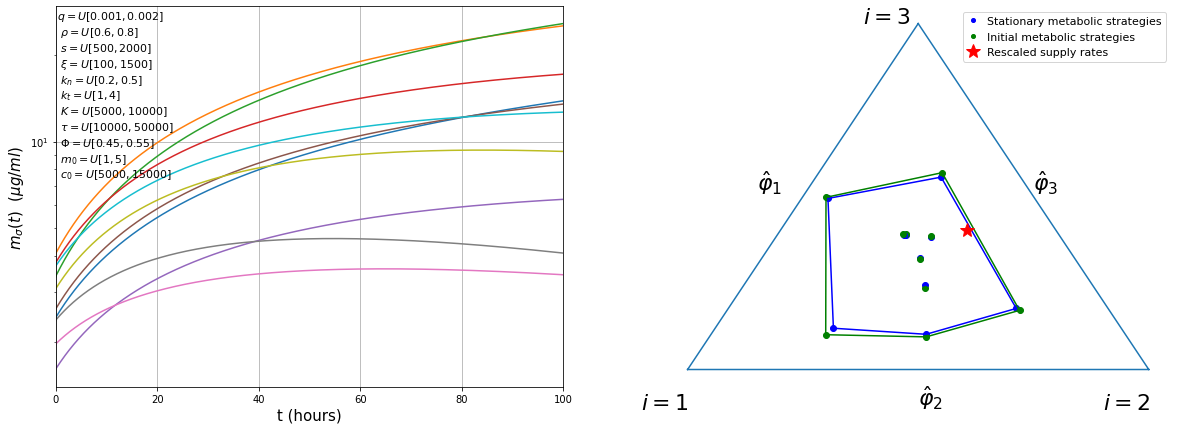

In [212]:
repr(dictionary_solutioncpr2)

In [236]:
dictionary_solutioncpr3 = cpr(  N = 100000,
                                dt = 0.001,
                                ns = 10,
                                nr = 3,
                                x = 1,
                                random_seed=True,
                                seed=1,
                                q = np.random.uniform(0.001,0.002,ns), 
                                rho = np.random.uniform(0.6,0.8,size = ns), 
                                s = np.random.uniform(500,2000,nr), 
                                xi = np.random.uniform(100,1500,nr),  
                                kn = np.random.uniform(0.2,0.5,size = nr), 
                                kt = np.random.uniform(1,4,size = ns),  
                                K = np.random.uniform(5000,10000, size = nr),
                                tau = np.random.uniform(10,50, size = ns),
                                Phi = np.random.uniform(0.45,0.55,size = ns),
                                m0 = np.random.uniform(1,5,size = ns),
                                c0 = np.random.uniform(5000, 20000, size = nr))

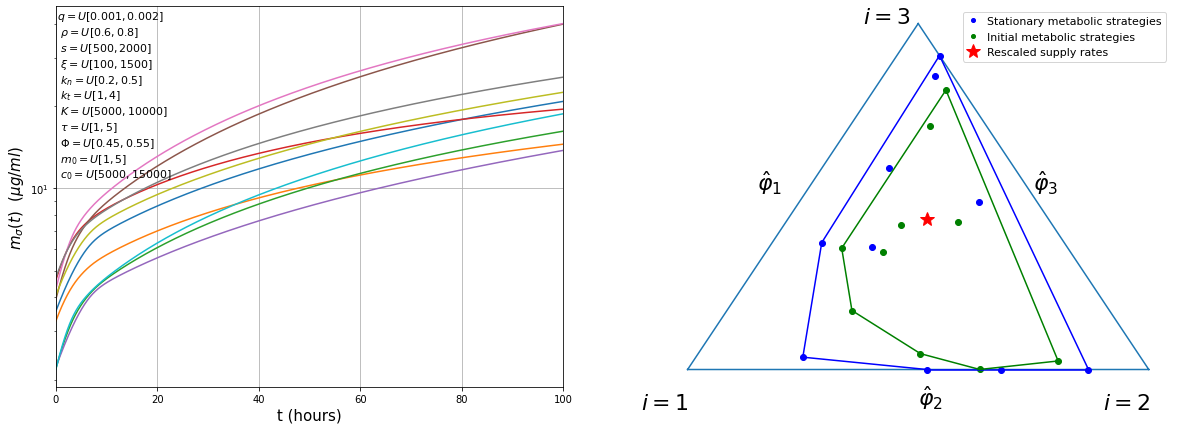

In [237]:
repr(dictionary_solutioncpr3)

In [198]:
soll = []
for z in range(1,11):
    
    dic = cpr(  N = 100000,
                dt = 0.001,
                ns = 10,
                nr = 3,
                x = z,
                y = 1,
                random_seed=True,
                seed=133,
                q = np.random.uniform(0.001,0.002,ns), 
                rho = np.random.uniform(0.6,0.8,size = ns), 
                s = np.random.uniform(500,2000,nr), 
                xi = np.random.uniform(100,1500,nr),  
                kn = np.random.uniform(0.2,0.5,size = nr), 
                kt = np.random.uniform(1,4,size = ns),  
                K = np.random.uniform(5000,10000, size = nr),
                tau = np.random.uniform(10,50, size = ns),
                Phi = np.random.uniform(0.45,0.55,size = ns),
                m0 = np.random.uniform(1,5,size = ns),
                c0 = np.random.uniform(5000, 20000, size = nr))

    Phicpr1 = dic['Phi']
    rhocpr1 = dic['rho']
    ktcpr1 = dic['kt']
    qcpr1 = dic['q']
    # if np.all(Phicpr1/(rhocpr1*(5 + 1/ktcpr1)) == qcpr1): 
    #     print('First condition for coexistence is valid')
    # if np.any(Phicpr1/(rhocpr1*(5 + 1/ktcpr1)) == qcpr1):
    #     print('First condition for coexistence is valid for some species')
    kncpr1 = dic['kn']
    xicpr1 = dic['xi']
    scpr1 = dic['s']
    phicpr1 = dic['phi']
    phicpr1_hat = ((phicpr1[-1]/phicpr1[-1].sum(axis = 1)[:,None]) + 0.5)*0.5
    phicpr1_hat_in = phicpr1[0]/phicpr1[0].sum(axis = 1)[:,None]
    # scpr1_hat = (scpr1*kncpr1/xicpr1/((scpr1*kncpr1/xicpr1).sum()))

    # Phicpr1/(rhocpr1*(10 + (1/ktcpr1))), qcpr1
    soll.append(dic['sol'][-1,:ns])

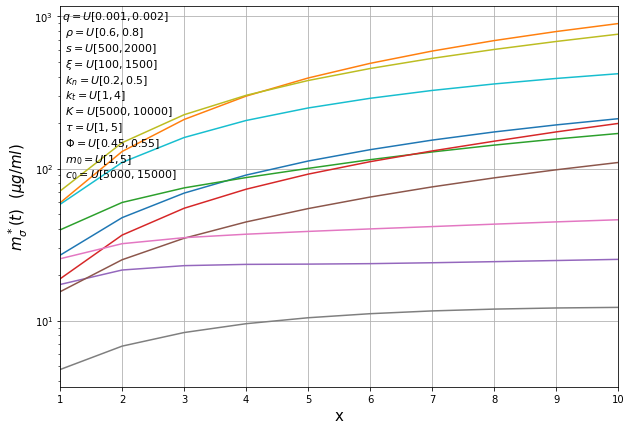

In [199]:
soll = np.array(soll)
plt.figure(figsize = (10,7))

for i in range(10):
    plt.plot(np.arange(1,11), soll.T[i])
plt.yscale('log')
plt.grid()
plt.xlim(1,10)
plt.annotate('$q = U[0.001,0.002]$ \n $\\rho = U[0.6,0.8]$ \n $s = U[500,2000]$ \n $\\xi = U[100,1500]$ \n $k_n = U[0.2,0.5]$ \n $k_t = U[1,4]$ \n $K = U[5000,10000]$ \n $\\tau = U[1,5]$ \n $\\Phi = U[0.45,0.55]$ \n $m_0 = U[1,5]$ \n $c_0 = U[5000,15000]$', xy=(0.003, 0.55), xycoords='axes fraction', size = 11)
plt.ylabel('$m_{\\sigma}^*(t) $  $(\\mu g / ml)$', size = 15)
plt.xlabel('x', size = 15)
plt.show()

In [641]:
soll1 = []
for z1 in range(1,200,10):
    
    dic = cpr(  N = 100000,
                dt = 0.001,
                ns = 10,
                nr = 3,
                x = 1,
                y = z1,
                random_seed=True,
                seed=133,
                q = np.random.uniform(0.001,0.002,ns), 
                rho = np.random.uniform(0.6,0.8,size = ns), 
                s = np.random.uniform(500,2000,nr), 
                xi = np.random.uniform(100,1500,nr),  
                kn = np.random.uniform(0.2,0.5,size = nr), 
                kt = np.random.uniform(1,4,size = ns),  
                K = np.random.uniform(5000,10000, size = nr),
                tau = np.random.uniform(10,50, size = ns),
                Phi = np.random.uniform(0.45,0.55,size = ns),
                m0 = np.random.uniform(1,5,size = ns),
                c0 = np.random.uniform(5000, 20000, size = nr))

    Phicpr1 = dic['Phi']
    rhocpr1 = dic['rho']
    ktcpr1 = dic['kt']
    qcpr1 = dic['q']
    # if np.all(Phicpr1/(rhocpr1*(5 + 1/ktcpr1)) == qcpr1): 
    #     print('First condition for coexistence is valid')
    # if np.any(Phicpr1/(rhocpr1*(5 + 1/ktcpr1)) == qcpr1):
    #     print('First condition for coexistence is valid for some species')
    kncpr1 = dic['kn']
    xicpr1 = dic['xi']
    scpr1 = dic['s']
    phicpr1 = dic['phi']
    phicpr1_hat = ((phicpr1[-1]/phicpr1[-1].sum(axis = 1)[:,None]) + 0.5)*0.5
    phicpr1_hat_in = phicpr1[0]/phicpr1[0].sum(axis = 1)[:,None]
    # scpr1_hat = (scpr1*kncpr1/xicpr1/((scpr1*kncpr1/xicpr1).sum()))

    # Phicpr1/(rhocpr1*(10 + (1/ktcpr1))), qcpr1
    soll1.append(dic['sol'][-1,:ns])

In [319]:
# soll1 = np.array(soll1)

soll2 = cpr(N = 100000,
            dt = 0.001,
            ns = 10,
            nr = 3,
            random_seed=True,
            q = np.random.uniform(0.1,0.5,ns), 
            rho = np.random.uniform(0.5,0.9,size = ns), 
            s = np.random.uniform(500,2000,nr), 
            xi = np.random.uniform(1000,15000,nr),  
            kn = np.random.uniform(5,10,size = nr), 
            kt = np.random.uniform(1,5,size = ns),  
            K = np.random.uniform(500,1000, size = nr),
            tau = np.random.uniform(10000,50000, size = ns),
            Phi = np.random.uniform(0.45,0.55,size = ns),
            m0 = np.random.uniform(1,5,size = ns),
            c0 = np.random.uniform(5, 15, size = nr))['sol'][:,:ns]
# soll2.shape

KeyboardInterrupt: 

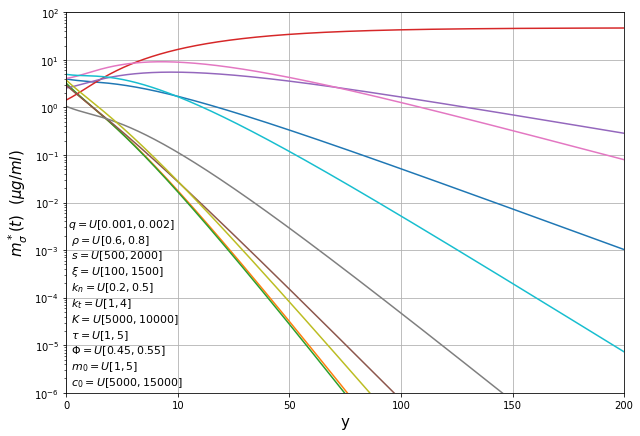

In [204]:
plt.figure(figsize = (10,7))

for i in range(10):
    plt.plot(dictionary_solutioncpr1['t'], soll2.T[i])
plt.annotate('$q = U[0.001,0.002]$ \n $\\rho = U[0.6,0.8]$ \n $s = U[500,2000]$ \n $\\xi = U[100,1500]$ \n $k_n = U[0.2,0.5]$ \n $k_t = U[1,4]$ \n $K = U[5000,10000]$ \n $\\tau = U[1,5]$ \n $\\Phi = U[0.45,0.55]$ \n $m_0 = U[1,5]$ \n $c_0 = U[5000,15000]$', xy=(0.003, 0.02), xycoords='axes fraction', size = 11)
plt.yscale('log')
plt.grid()
plt.xlim(1,100)
plt.ylim(10**(-6),10**2)
plt.ylabel('$m_{\\sigma}^*(t) $  $(\\mu g / ml)$', size = 15)
plt.xlabel('y', size = 15)
plt.xticks([0,20,40,60,80,100],[0,10,50,100,150,200])
plt.show()

### Ensamble di matrici 

In [9]:
# first try 
dictionary_solutioncpr333 = cpr(N = 100000,
                                dt = 0.001,
                                ns = 10,
                                nr = 3,
                                q = np.random.uniform(0.001,0.001,ns), 
                                rho = np.random.uniform(0.6,0.8,size = ns), 
                                s = np.random.uniform(50,200,nr), 
                                xi = np.random.uniform(1000,1500,nr),  
                                kn = np.random.uniform(2,5,size = nr), 
                                kt = np.random.uniform(10,40,size = ns),  
                                K = np.random.uniform(500,1000, size = nr),
                                tau = np.random.uniform(100,500, size = ns),
                                Phi = np.random.uniform(0.45,0.55,size = ns),
                                m0 = np.random.uniform(1,5,size = ns),
                                c0 = np.random.uniform(5000, 15000, size = nr))

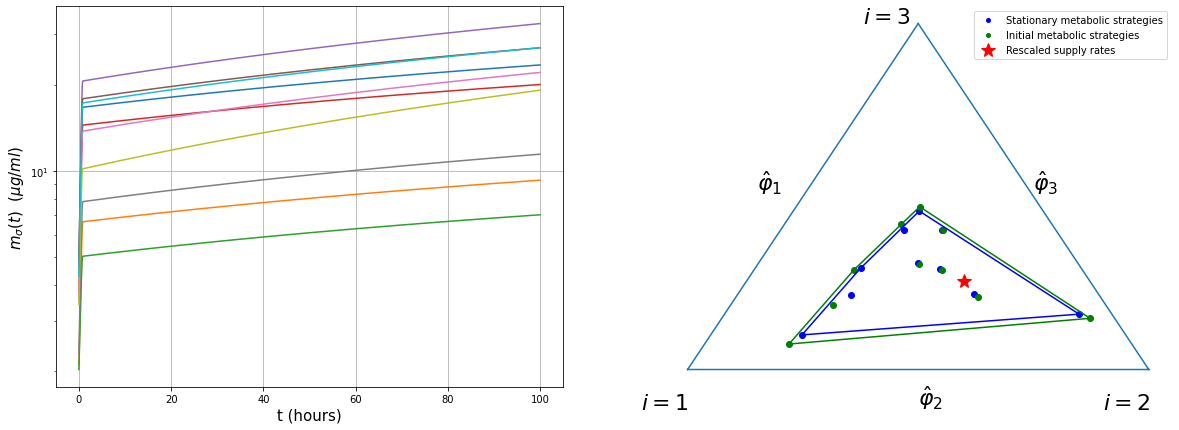

In [10]:
repr(dictionary_solutioncpr333)

#### How metabolic strategies change during time for a single run of a simulation

First case when $\tau_{\sigma} \gg 1$ and $\gamma_{\sigma i} \approx 0$

In [14]:
l_strategies = []
for i in range(10):
    l_strategies.append(cpr( N = 100000,
                        dt = 0.001,
                        ns = 10,
                        nr = 3,
                        x = 1,
                        q = np.random.uniform(0.001,0.001,ns), 
                        rho = np.random.uniform(0.6,0.8,size = ns), 
                        s = np.random.uniform(50,200,nr), 
                        xi = np.random.uniform(1000,1500,nr),  
                        kn = np.random.uniform(2,5,size = nr), 
                        kt = np.random.uniform(10,40,size = ns),  
                        K = np.random.uniform(500,1000, size = nr),
                        tau = np.random.uniform(100,500, size = ns),
                        Phi = np.random.uniform(0.45,0.55,size = ns),
                        m0 = np.random.uniform(1,5,size = ns),
                        c0 = np.random.uniform(5000, 15000, size = nr))['phi'])

In [16]:
# plt.figure(figsize = (10,7))
# for i in range(10):
# plt.plot(l_strategies[0][-4].T[0], 'o-')
s1 = np.array([l_strategies[0][i].T[0] for i in range(l_strategies[0].shape[0])])
s2 = np.array([l_strategies[0][i].T[1] for i in range(l_strategies[0].shape[0])])
s3 = np.array([l_strategies[0][i].T[2] for i in range(l_strategies[0].shape[0])])


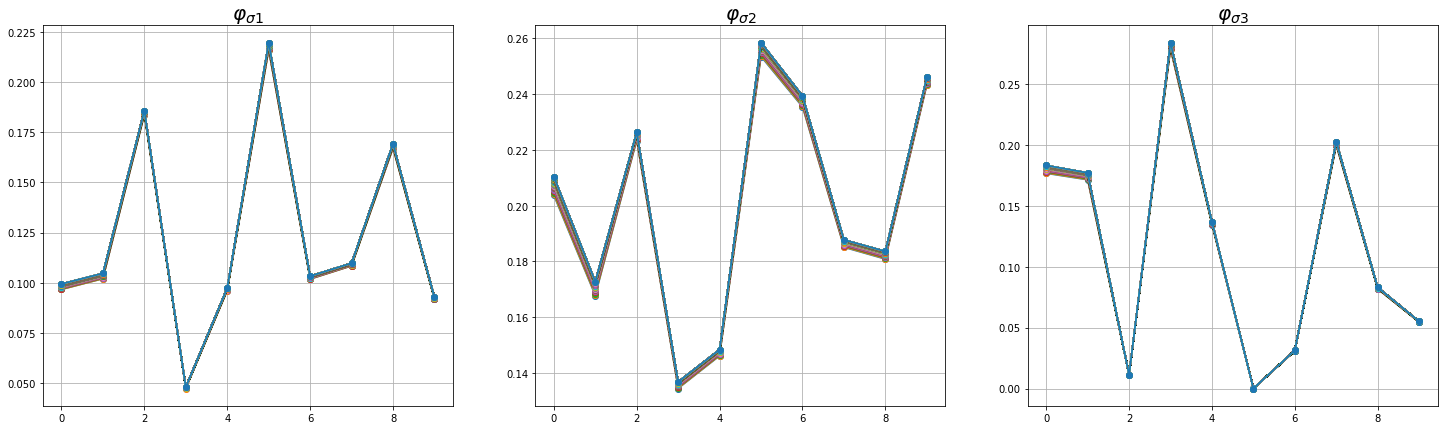

In [100]:
fig, ax = plt.subplots(1,3, figsize = (25,7))

# plt.figure(figsize = (10,7))

for i in range(0, s1.shape[0], 100):
    ax[0].plot(s1[i], 'o-')
    ax[1].plot(s2[i], 'o-')
    ax[2].plot(s3[i], 'o-')
ax[0].grid()
ax[0].set_title('$\\varphi_{\\sigma 1}$', size = 20)
ax[1].grid()
ax[1].set_title('$\\varphi_{\\sigma 2}$', size = 20)
ax[2].grid()
ax[2].set_title('$\\varphi_{\\sigma 3}$', size = 20)

plt.show()


Second case when $\tau_{\sigma} \gg 1$ and $\gamma_{\sigma i} \ge 0$

In [11]:
l_strategies1 = []
for i in range(10):
    l_strategies1.append(cpr( N = 100000,
                        dt = 0.001,
                        ns = 10,
                        nr = 3,
                        q = np.random.uniform(0.001,0.001,ns), 
                        rho = np.random.uniform(0.6,0.8,size = ns), 
                        s = np.random.uniform(50,200,nr), 
                        xi = np.random.uniform(1000,1500,nr),  
                        kn = np.random.uniform(10,50,size = nr), 
                        kt = np.random.uniform(1,4,size = ns),  
                        K = np.random.uniform(500,1000, size = nr),
                        tau = np.random.uniform(10,50, size = ns),
                        Phi = np.random.uniform(0.45,0.55,size = ns),
                        m0 = np.random.uniform(1,5,size = ns),
                        c0 = np.random.uniform(5000, 15000, size = nr))['phi'])

In [18]:
s11 = np.array([l_strategies1[0][i].T[0] for i in range(l_strategies1[0].shape[0])])
s21 = np.array([l_strategies1[0][i].T[1] for i in range(l_strategies1[0].shape[0])])
s31 = np.array([l_strategies1[0][i].T[2] for i in range(l_strategies1[0].shape[0])])

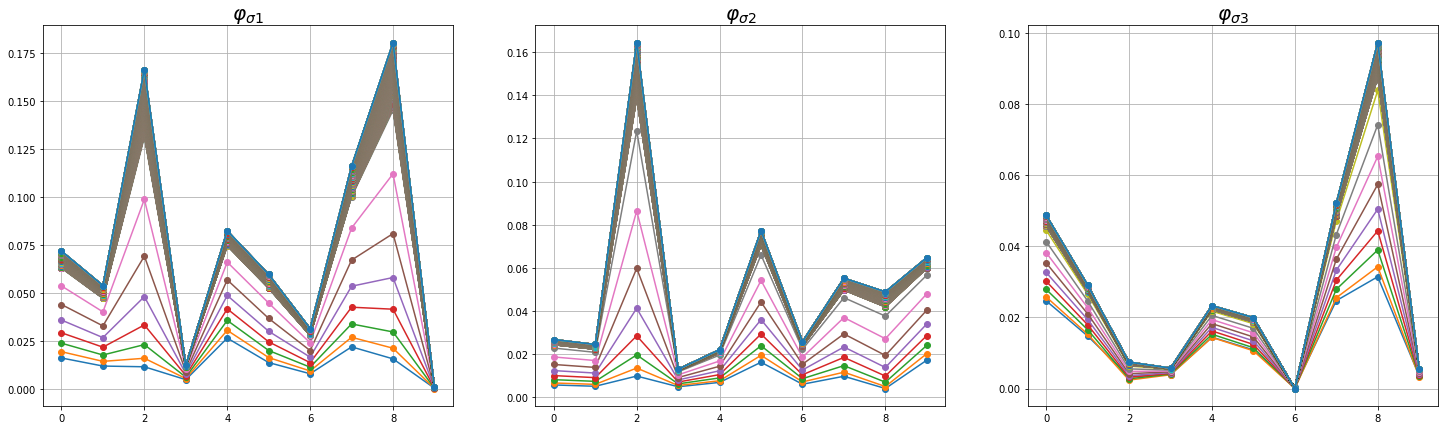

In [101]:
fig, ax = plt.subplots(1,3, figsize = (25,7))

# plt.figure(figsize = (10,7))

for i in range(0, s11.shape[0], 100):
    ax[0].plot(s11[i], 'o-')
    ax[1].plot(s21[i], 'o-')
    ax[2].plot(s31[i], 'o-')
ax[0].grid()
ax[0].set_title('$\\varphi_{\\sigma 1}$', size = 20)
ax[1].grid()
ax[1].set_title('$\\varphi_{\\sigma 2}$', size = 20)
ax[2].grid()
ax[2].set_title('$\\varphi_{\\sigma 3}$', size = 20)

plt.show()

#### Representing each of the ten components of phi vs time 
We get ten lines with as much points as the number of time iterations of the simulation

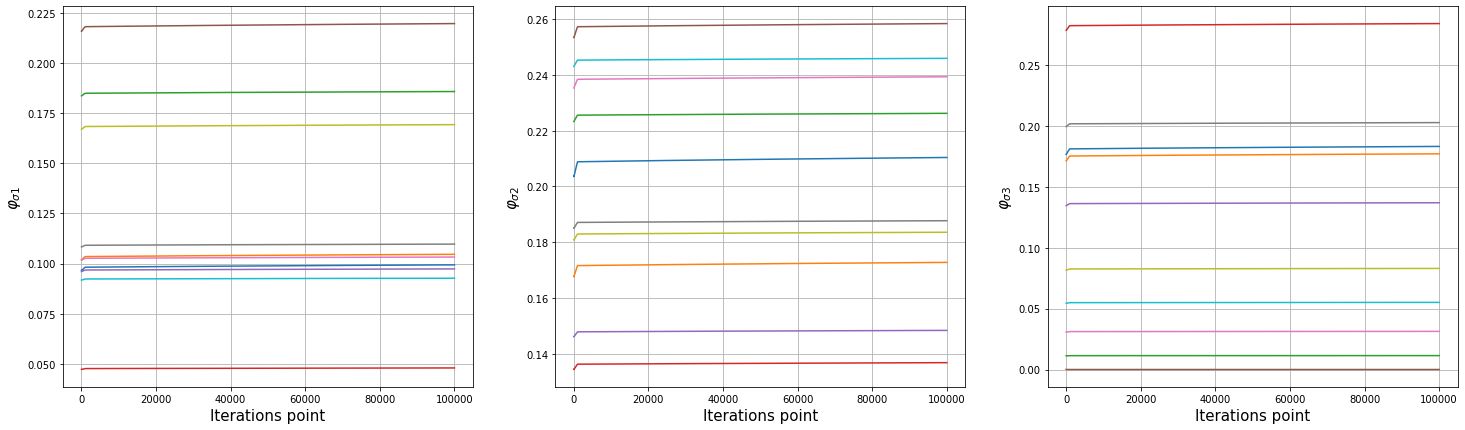

In [102]:
fig, ax = plt.subplots(1,3, figsize = (25,7))

for i in range(10):
    ax[0].plot(s1[:,i])
    # print(np.sum(s1[:,i]))
    ax[1].plot(s2[:,i])
    ax[2].plot(s3[:,i])
ax[0].grid()
ax[0].set_xlabel('Iterations point', size = 15)
ax[0].set_ylabel('$\\varphi_{\\sigma 1}$', size = 15)
ax[1].grid()
ax[1].set_xlabel('Iterations point', size = 15)
ax[1].set_ylabel('$\\varphi_{\\sigma 2}$', size = 15)
ax[2].grid()
ax[2].set_xlabel('Iterations point', size = 15)
ax[2].set_ylabel('$\\varphi_{\\sigma 3}$', size = 15)

plt.show()


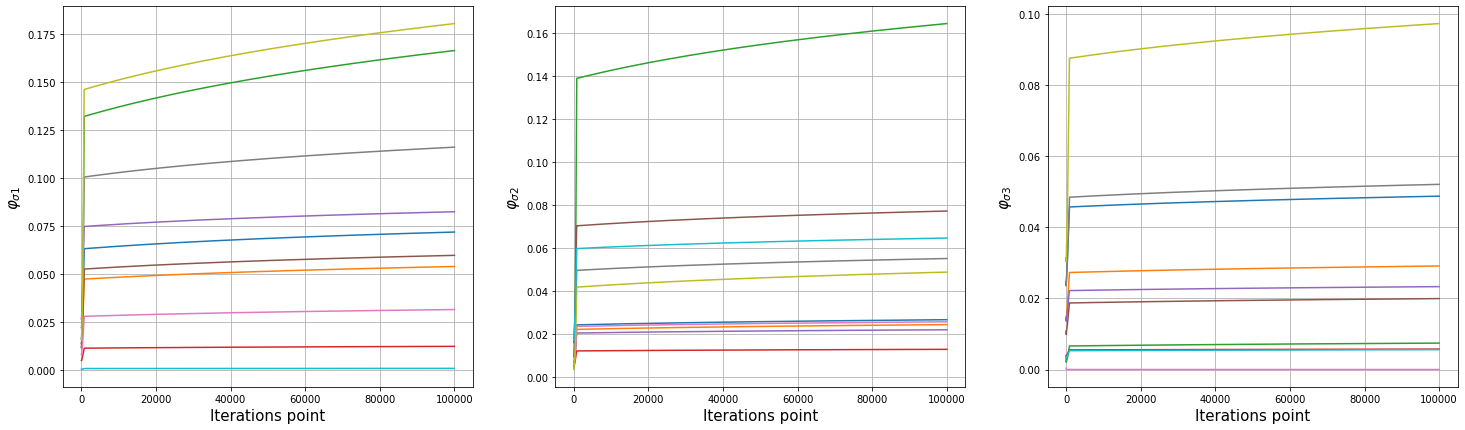

In [103]:
fig, ax = plt.subplots(1,3, figsize = (25,7))

for i in range(10):
    ax[0].plot(s11[:,i])
    # print(np.sum(s1[:,i]))
    ax[1].plot(s21[:,i])
    ax[2].plot(s31[:,i])
ax[0].grid()
ax[0].set_xlabel('Iterations point', size = 15)
ax[0].set_ylabel('$\\varphi_{\\sigma 1}$', size = 15)
ax[1].grid()
ax[1].set_xlabel('Iterations point', size = 15)
ax[1].set_ylabel('$\\varphi_{\\sigma 2}$', size = 15)
ax[2].grid()
ax[2].set_xlabel('Iterations point', size = 15)
ax[2].set_ylabel('$\\varphi_{\\sigma 3}$', size = 15)

plt.show()

Representing histograms for the final and initial metabolic strategies (index -1 and 0 of the second dimension)

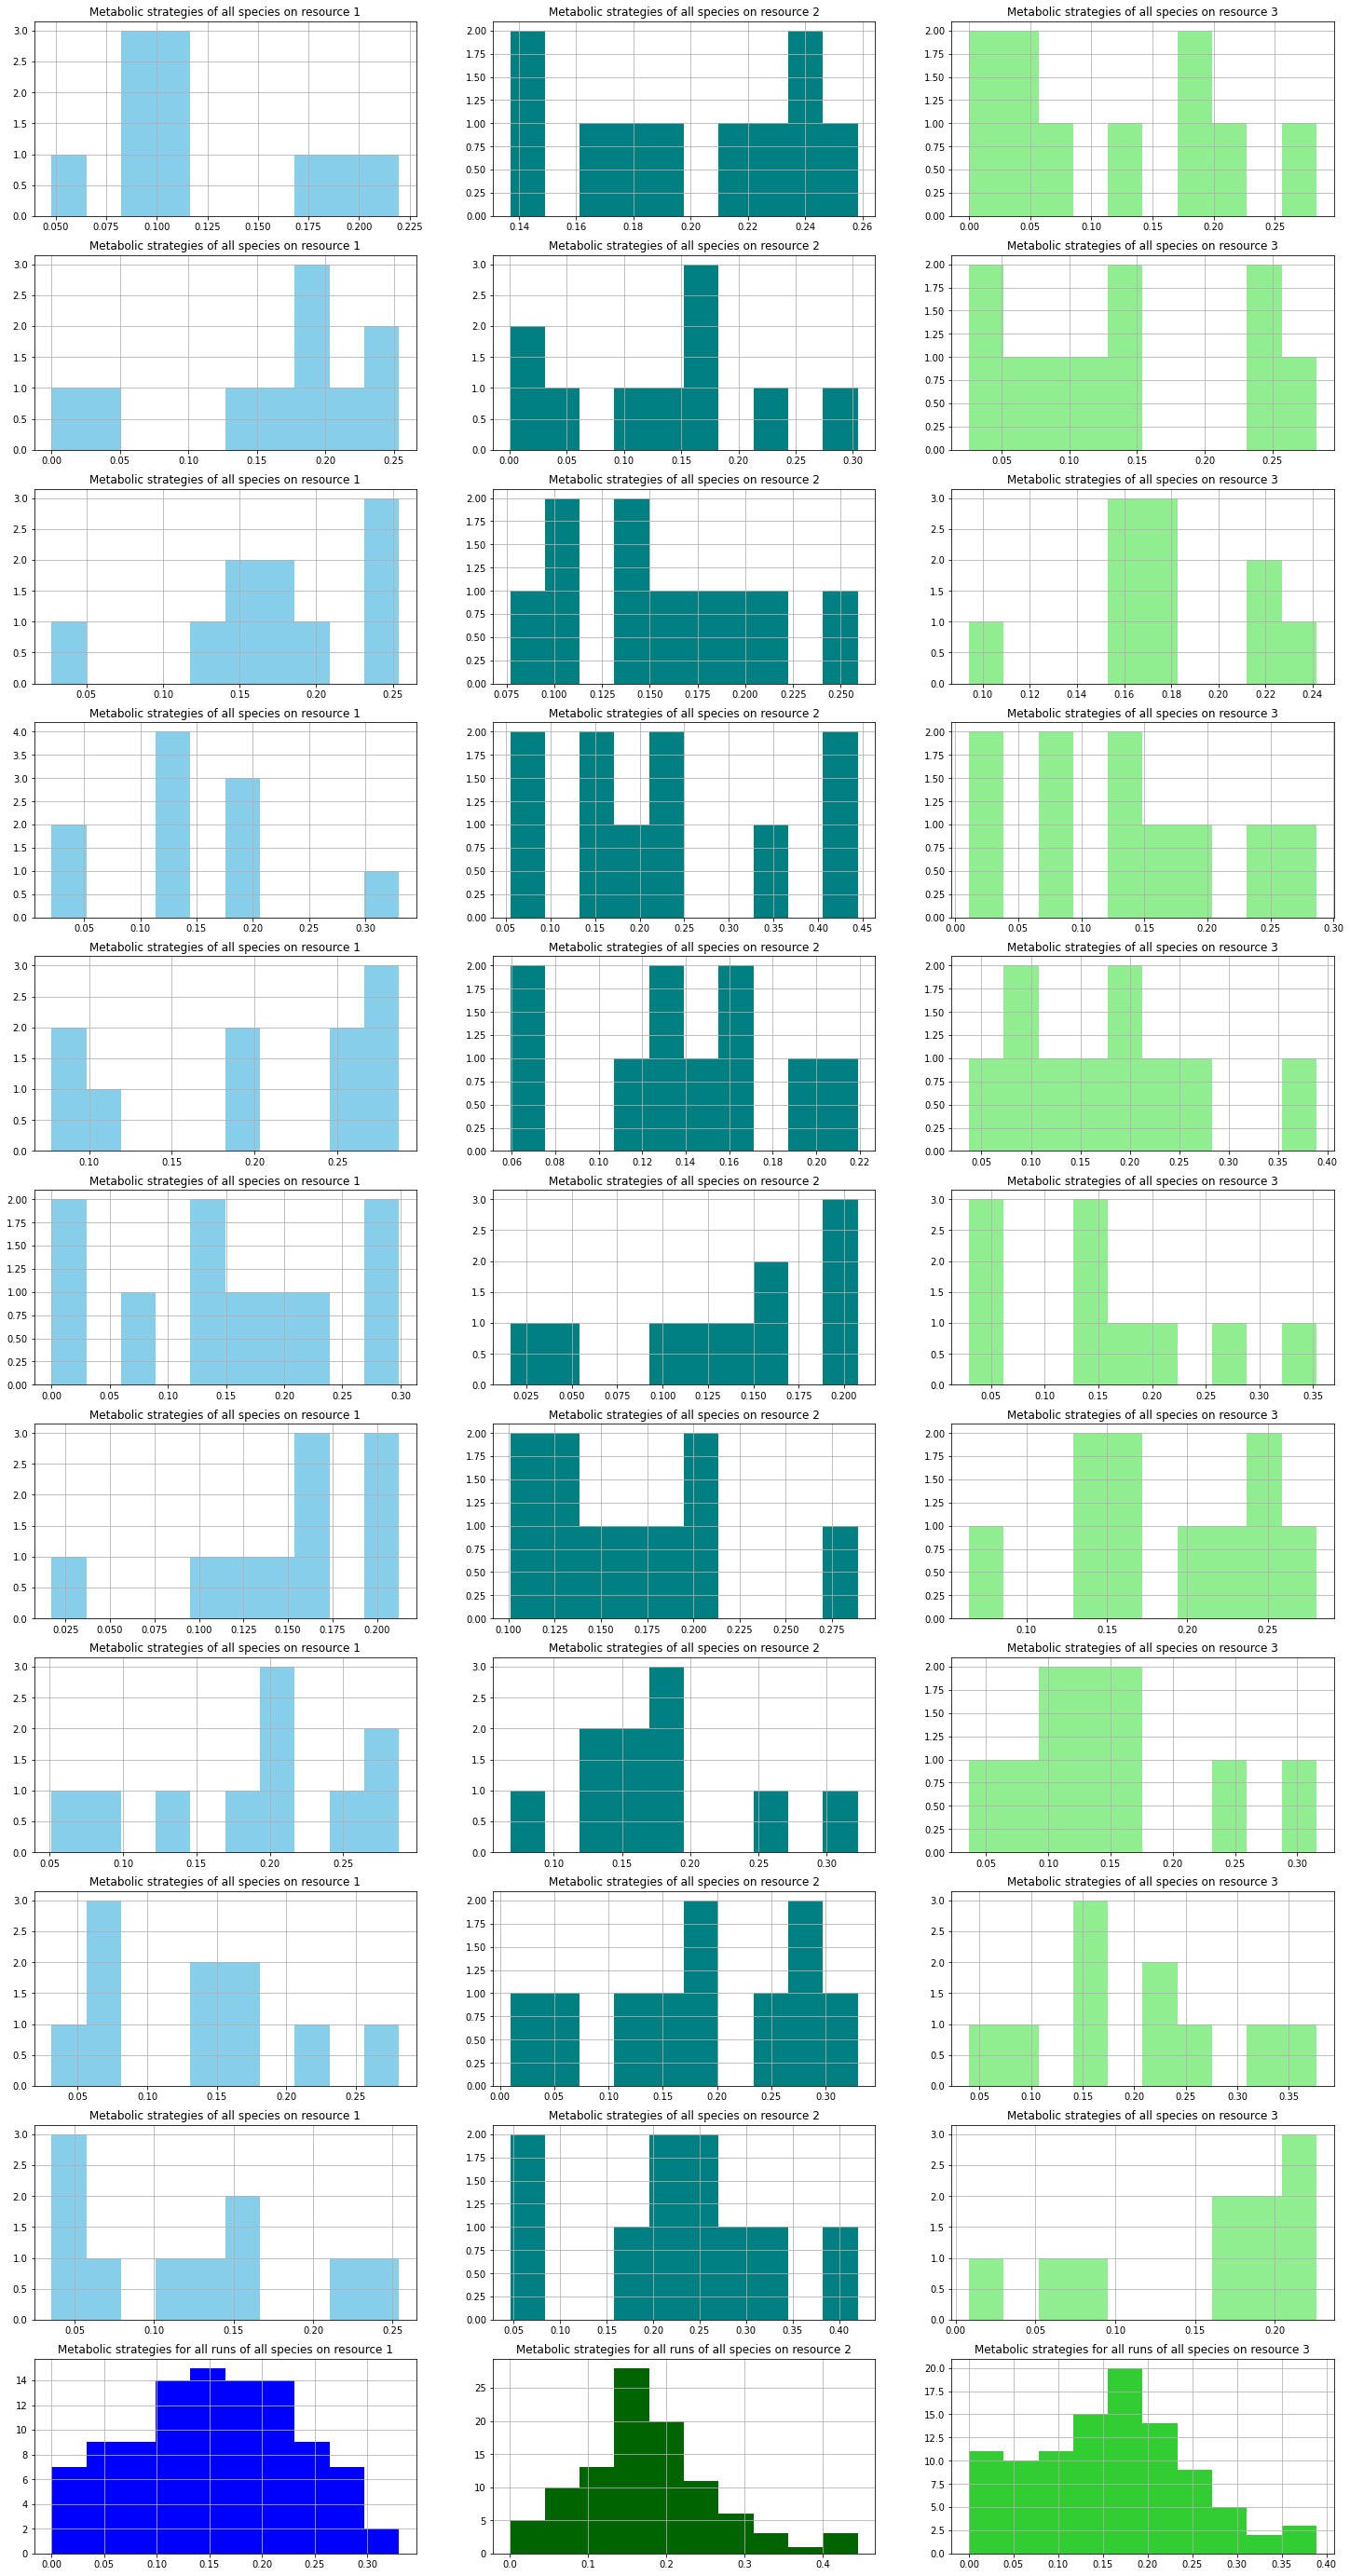

In [106]:
ensamble1 = np.array(l_strategies)
c = ['skyblue', 'teal', 'lightgreen']
csum = ['blue', 'darkgreen', 'limegreen']
# the first index of ensamble1 represents one of the random runs of the simulation
# the second index is the instant of time of that particular run of the simulation
# the third and fourth indexes are the rows and columns of the metabolic strategies matrix   
fig, ax = plt.subplots(11,3, figsize = (25,50))

for i in range(3):
    for j in range(10):
        ax[j,i].hist(ensamble1[j,-1,:,i].flatten(), color = c[i])
        ax[j,i].set_title('Metabolic strategies of all species on resource {}'.format(i+1))
        ax[j,i].grid()
    ax[10,i].hist(ensamble1[:,-1,:,i].flatten(), color = csum[i])
    ax[10,i].set_title('Metabolic strategies for all runs of all species on resource {}'.format(i+1))
    ax[10,i].grid()


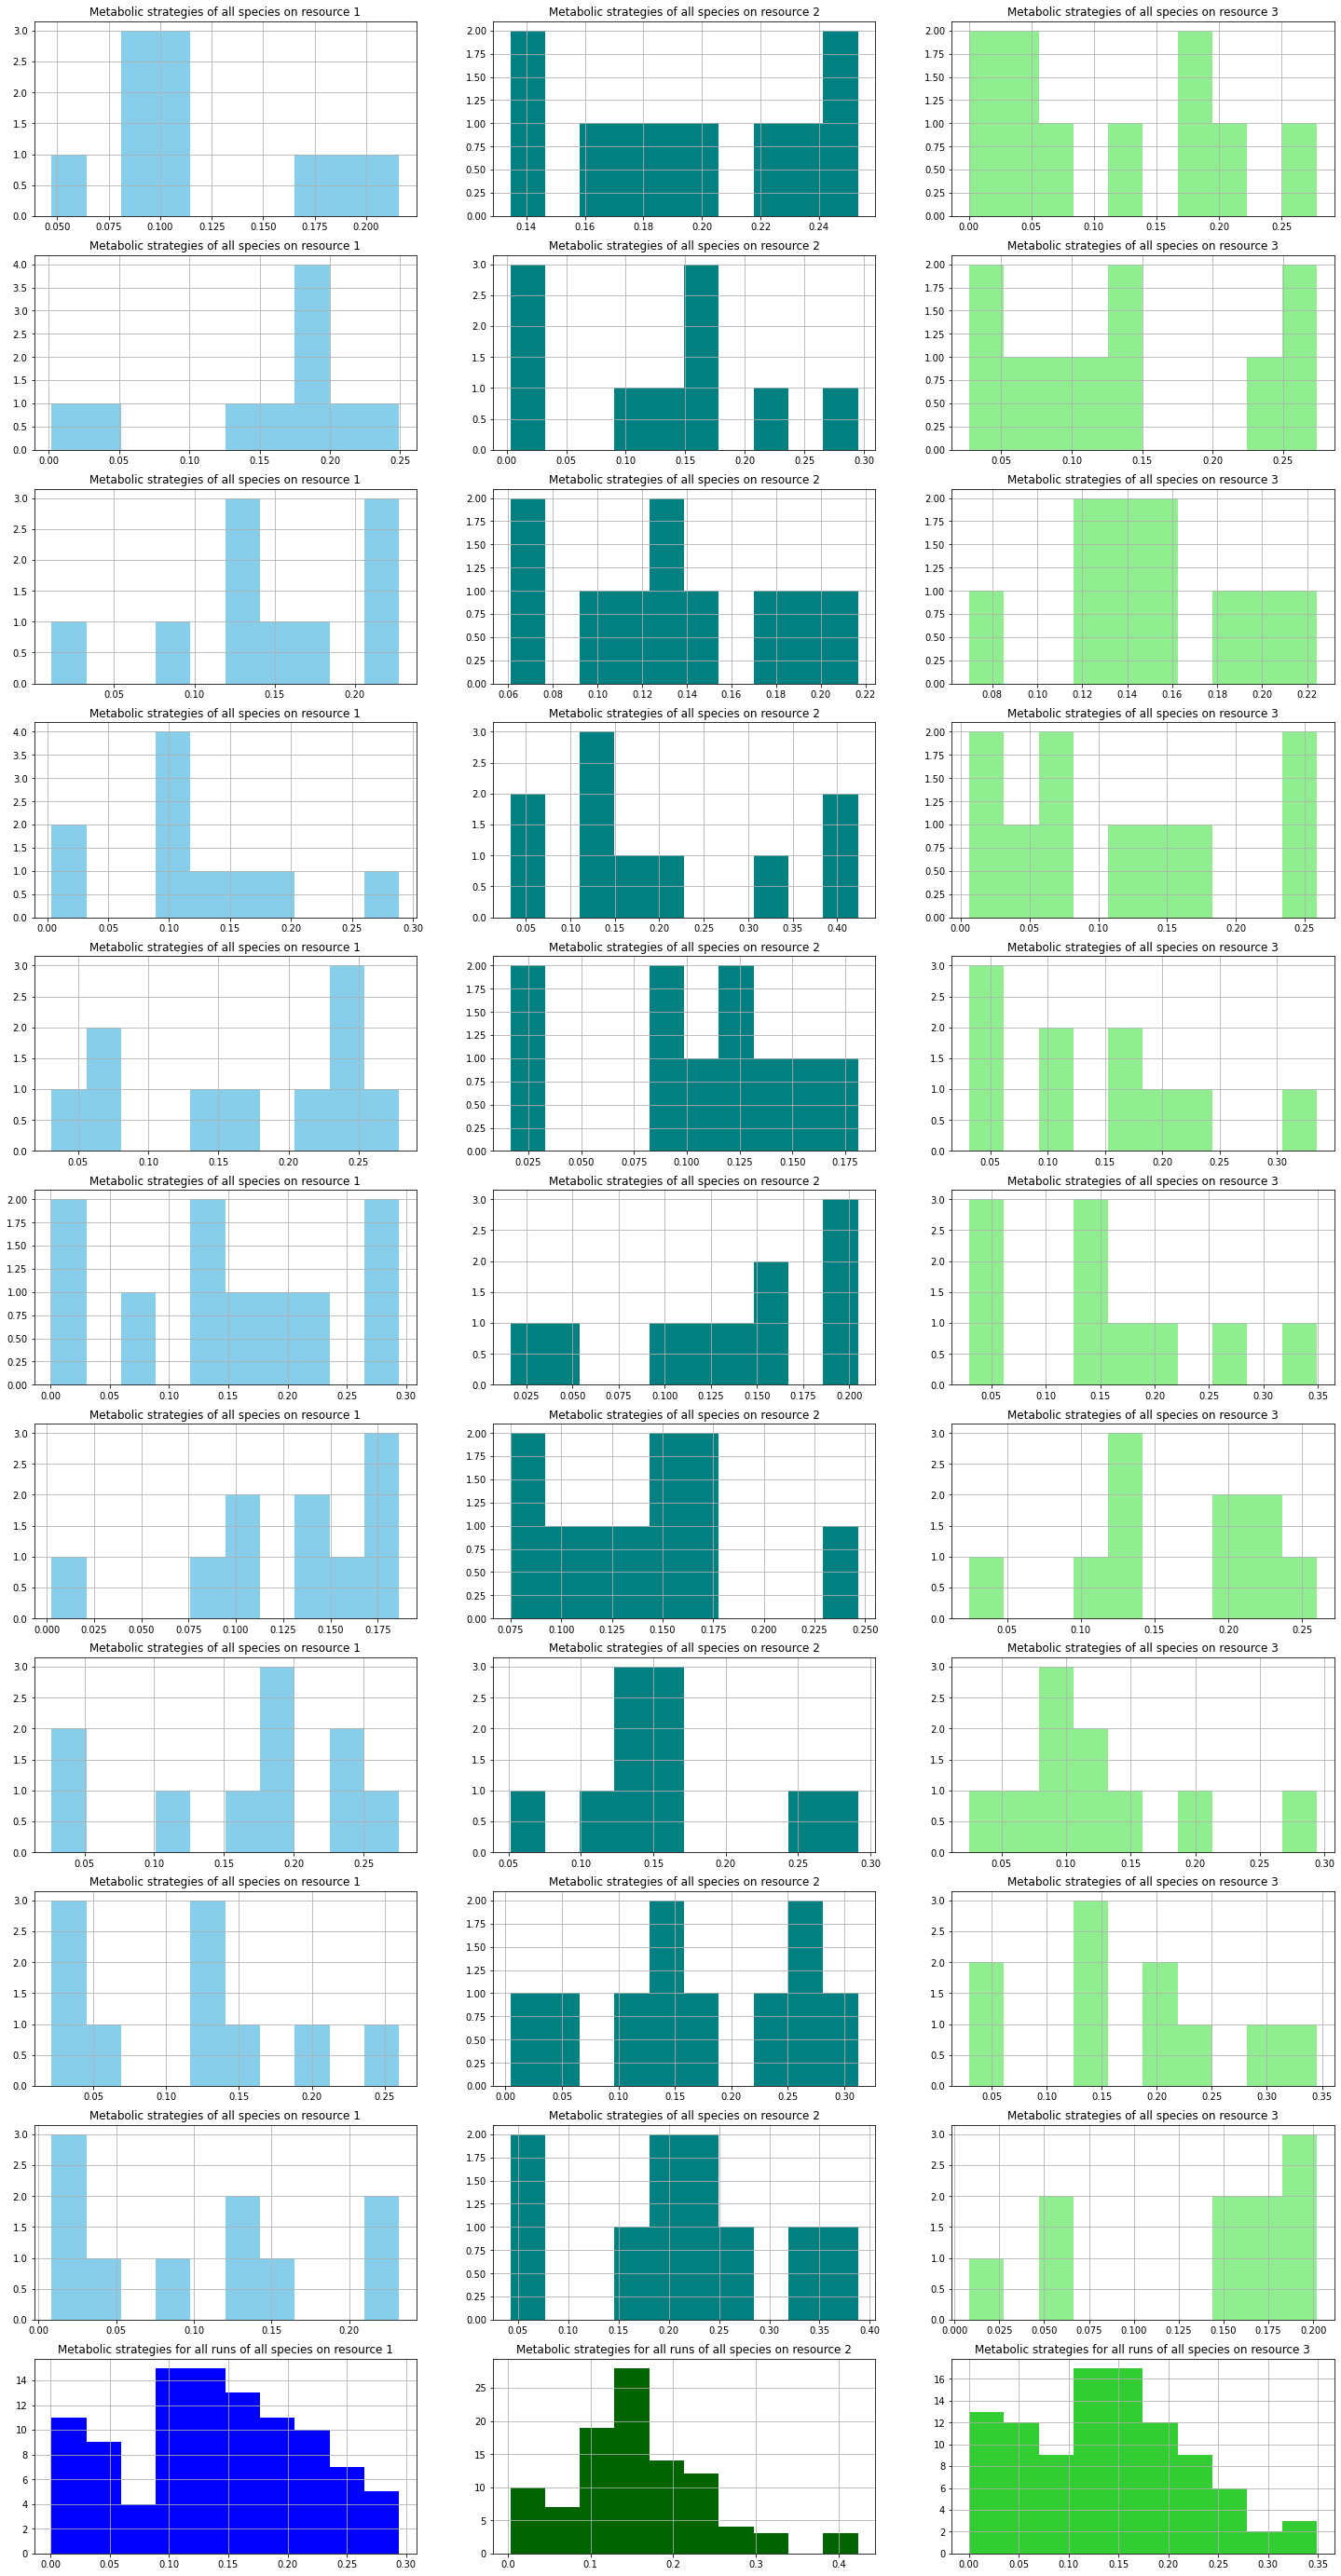

In [109]:
ensamble1 = np.array(l_strategies)
c = ['skyblue', 'teal', 'lightgreen']
csum = ['blue', 'darkgreen', 'limegreen']
# the first index of ensamble1 represents one of the random runs of the simulation
# the second index is the instant of time of that particular run of the simulation
# the third and fourth indexes are the rows and columns of the metabolic strategies matrix   
fig, ax = plt.subplots(11,3, figsize = (25,50))

for i in range(3):
    for j in range(10):
        ax[j,i].hist(ensamble1[j,0,:,i].flatten(), color = c[i])
        ax[j,i].set_title('Metabolic strategies of all species on resource {}'.format(i+1))
        ax[j,i].grid()
    ax[10,i].hist(ensamble1[:,0,:,i].flatten(), color = csum[i])
    ax[10,i].set_title('Metabolic strategies for all runs of all species on resource {}'.format(i+1))
    ax[10,i].grid()


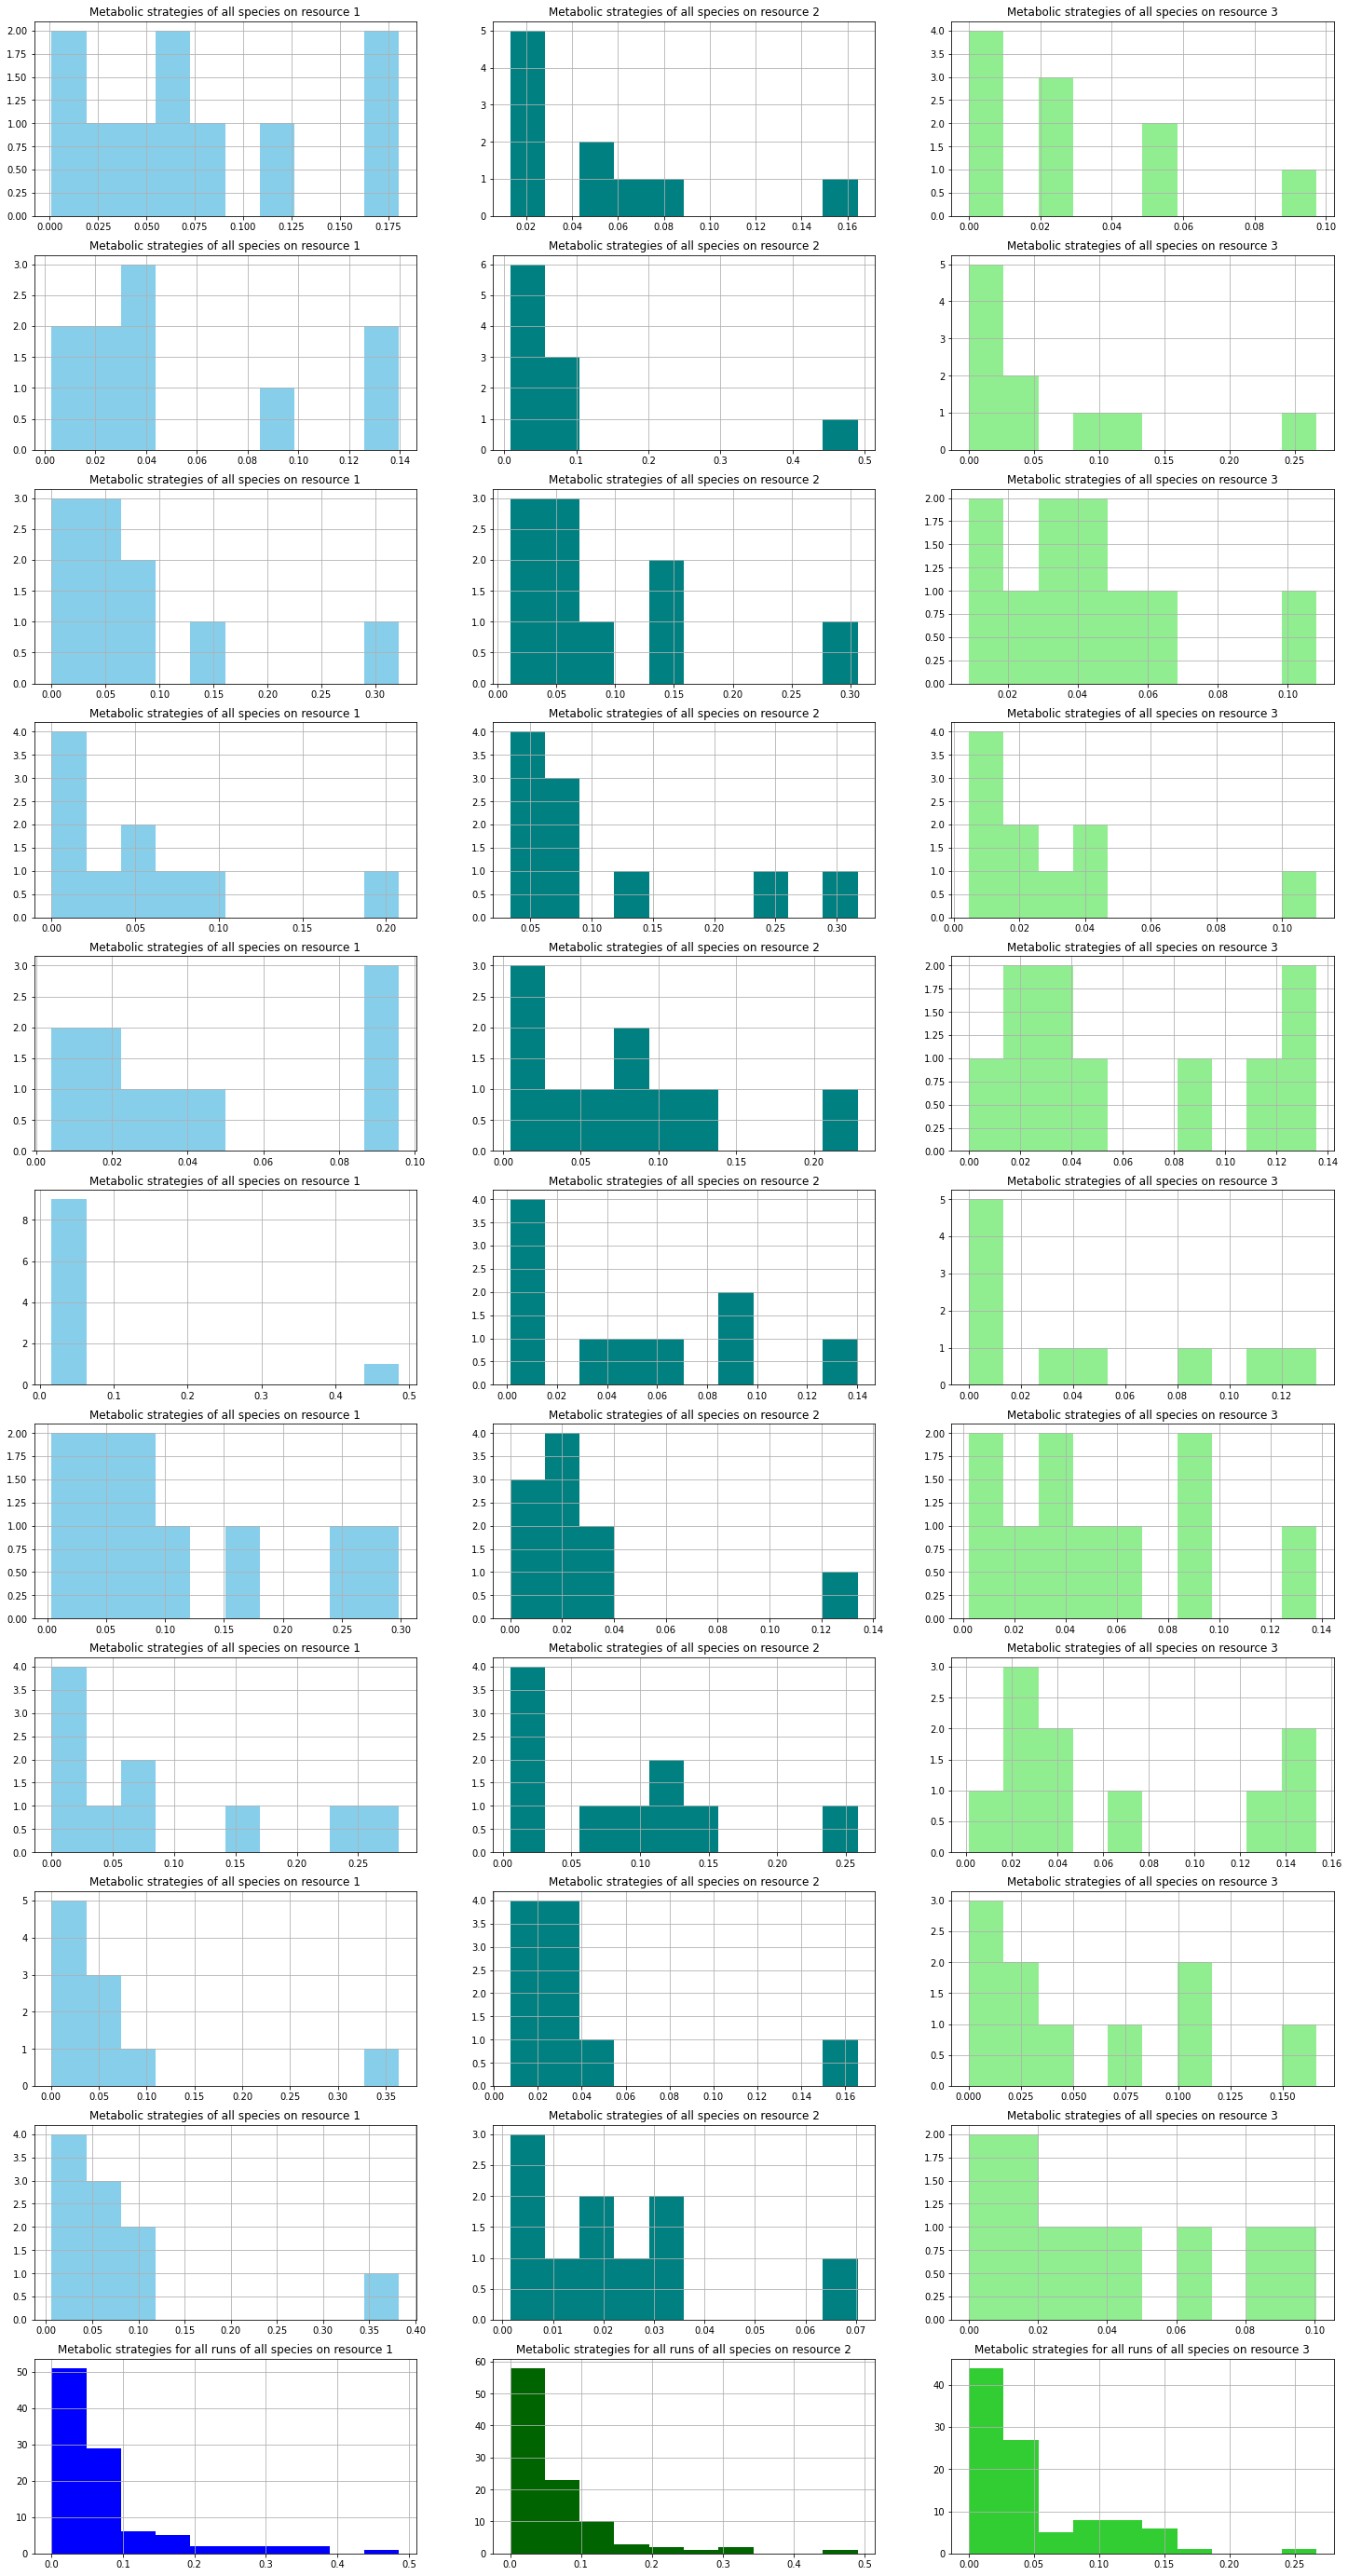

In [107]:
ensamble2 = np.array(l_strategies1)
c = ['skyblue', 'teal', 'lightgreen']
csum = ['blue', 'darkgreen', 'limegreen']
# the first index of ensamble1 represents one of the random runs of the simulation
# the second index is the instant of time of that particular run of the simulation
# the third and fourth indexes are the rows and columns of the metabolic strategies matrix   
fig, ax = plt.subplots(11,3, figsize = (25,50))

for i in range(3):
    for j in range(10):
        ax[j,i].hist(ensamble2[j,-1,:,i].flatten(), color = c[i])
        ax[j,i].set_title('Metabolic strategies of all species on resource {}'.format(i+1))
        ax[j,i].grid()
    ax[10,i].hist(ensamble2[:,-1,:,i].flatten(), color = csum[i])
    ax[10,i].set_title('Metabolic strategies for all runs of all species on resource {}'.format(i+1))
    ax[10,i].grid()

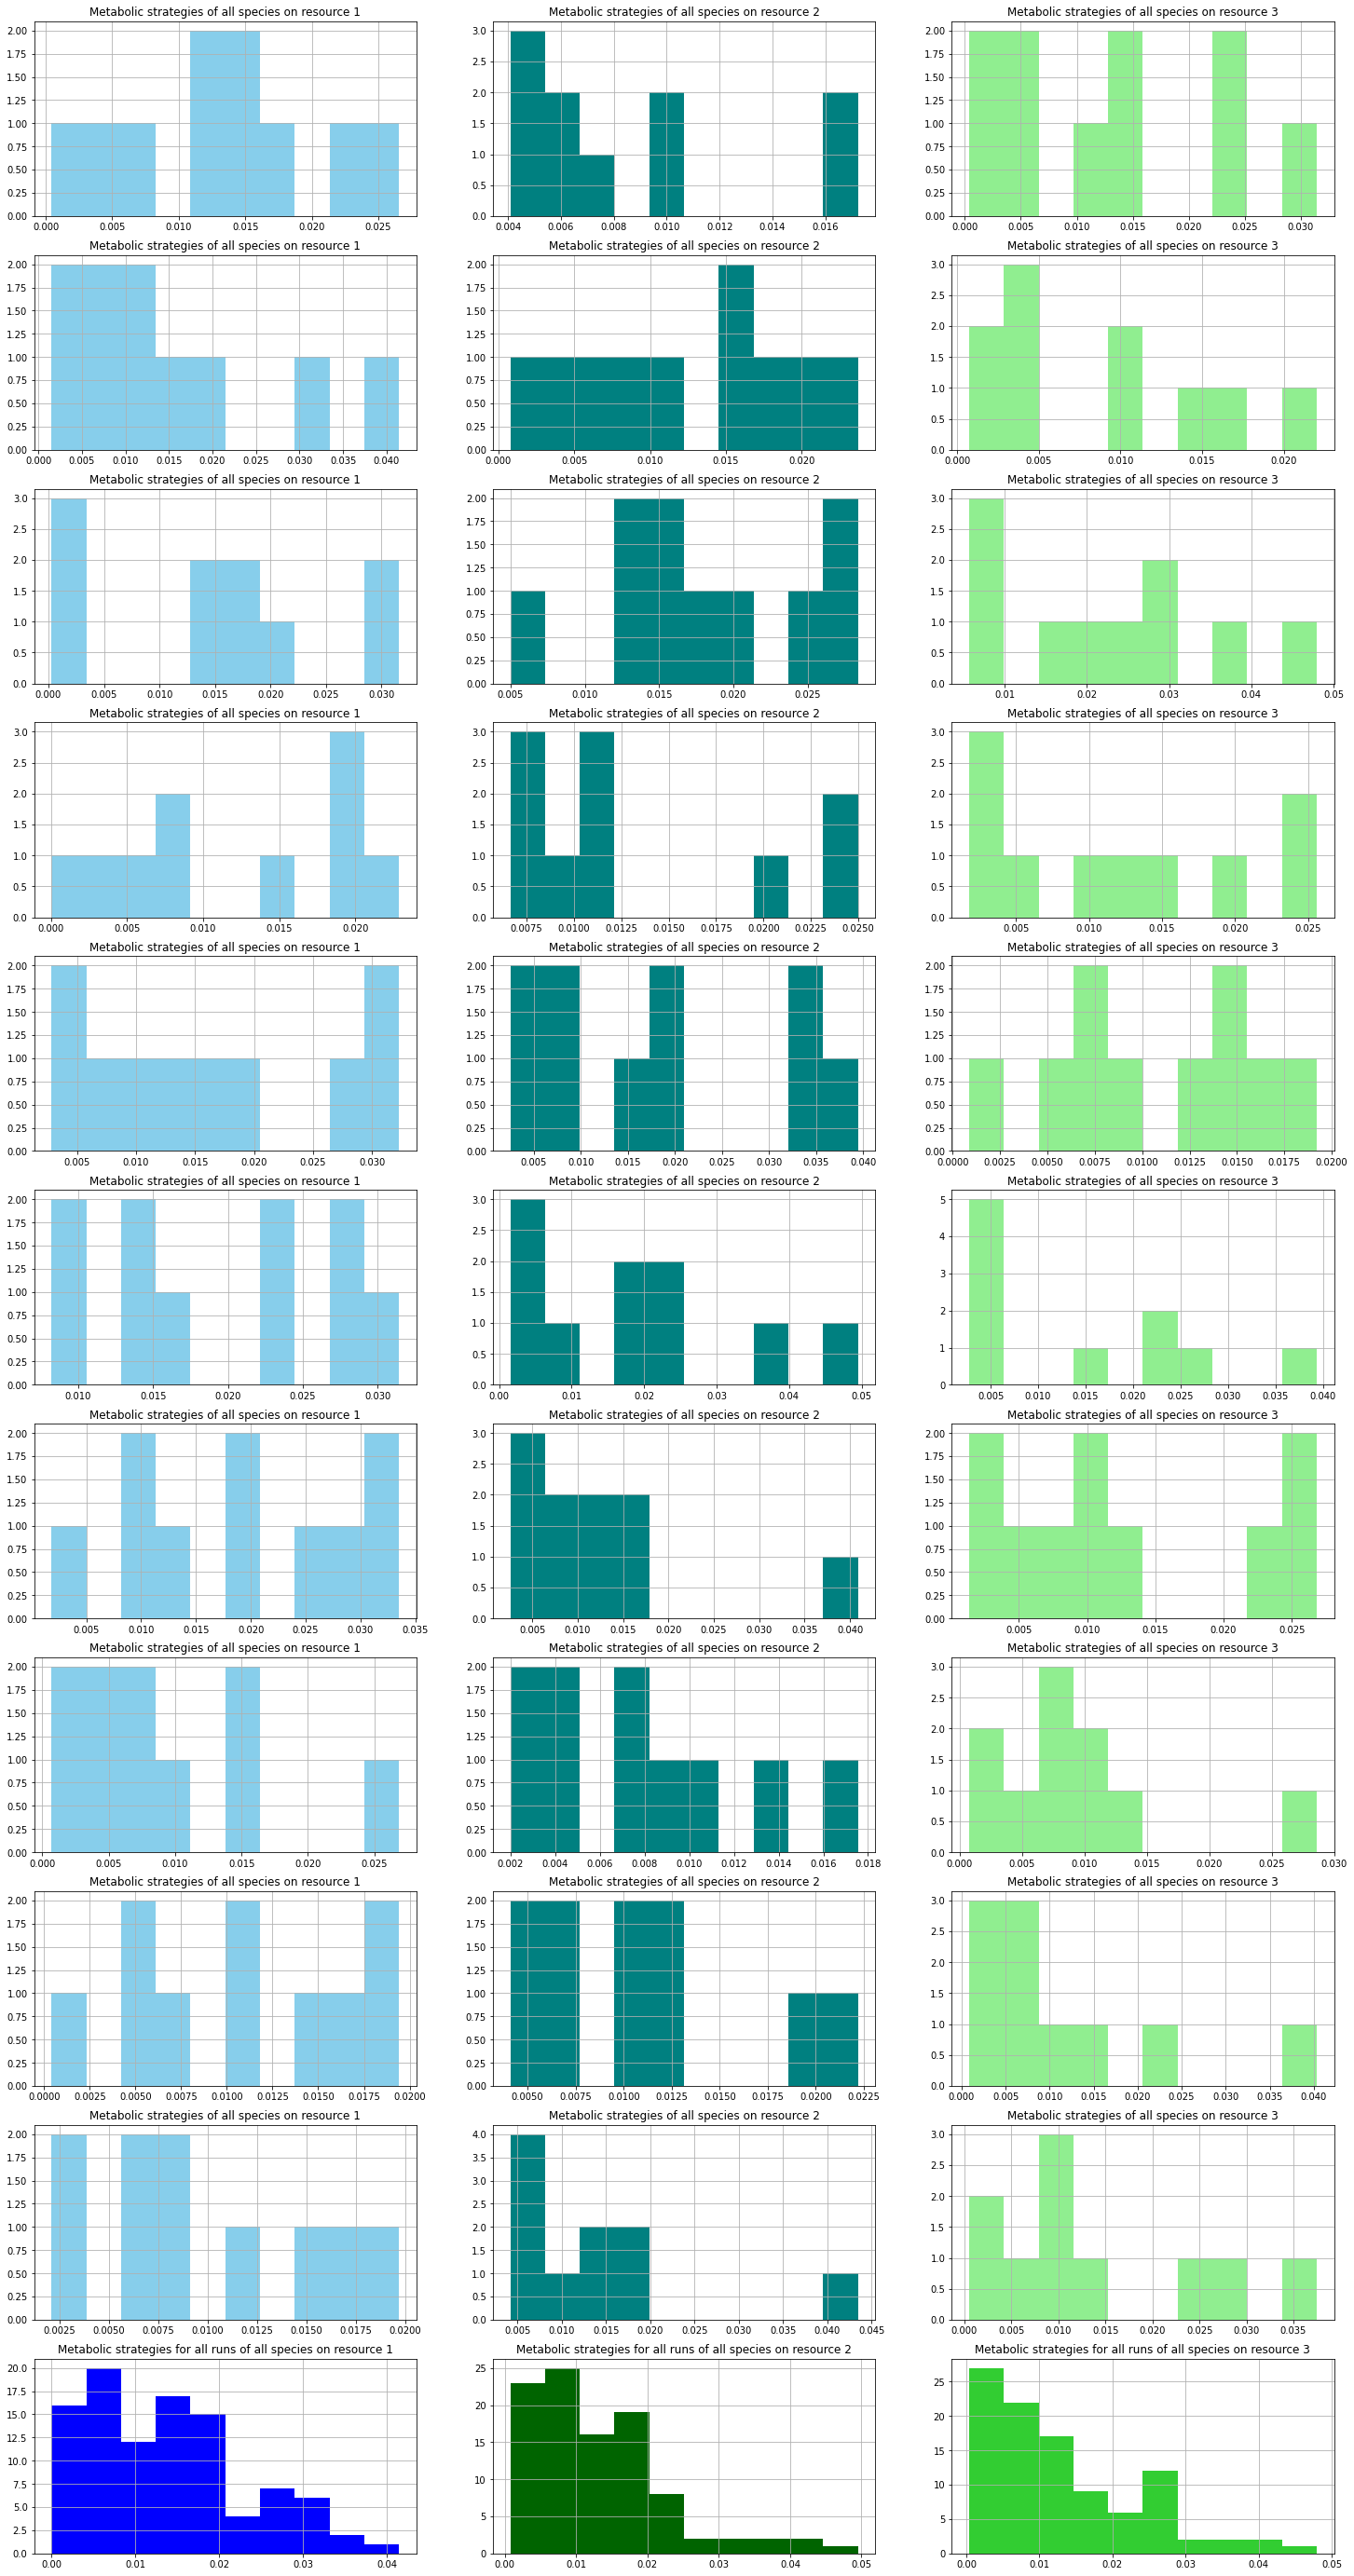

In [108]:
ensamble2 = np.array(l_strategies1)
c = ['skyblue', 'teal', 'lightgreen']
csum = ['blue', 'darkgreen', 'limegreen']
# the first index of ensamble1 represents one of the random runs of the simulation
# the second index is the instant of time of that particular run of the simulation
# the third and fourth indexes are the rows and columns of the metabolic strategies matrix   
fig, ax = plt.subplots(11,3, figsize = (25,50))

for i in range(3):
    for j in range(10):
        ax[j,i].hist(ensamble2[j,0,:,i].flatten(), color = c[i])
        ax[j,i].set_title('Metabolic strategies of all species on resource {}'.format(i+1))
        ax[j,i].grid()
    ax[10,i].hist(ensamble2[:,0,:,i].flatten(), color = csum[i])
    ax[10,i].set_title('Metabolic strategies for all runs of all species on resource {}'.format(i+1))
    ax[10,i].grid()

Let's explore how $\sum_{\sigma = 1}^{N_S}\varphi_{\sigma i}$ are distributed for different runs of the simulation, meaning changing initial conditions

In [41]:
ns = 100
nr = 30
a = cpr(N = 100000,
    dt = 0.001,
    ns = 100,
    nr = 30,
    q = np.random.uniform(0.001,0.001,ns), 
    rho = np.random.uniform(0.6,0.8,size = ns), 
    s = np.random.uniform(50,200,nr), 
    xi = np.random.uniform(1000,1500,nr),  
    kn = np.random.uniform(2,5,size = nr), 
    kt = np.random.uniform(10,40,size = ns),  
    K = np.random.uniform(500,1000, size = nr),
    tau = np.random.uniform(100,500, size = ns),
    Phi = np.random.uniform(0.45,0.55,size = ns),
    m0 = np.random.uniform(1,5,size = ns),
    c0 = np.random.uniform(5000, 15000, size = nr))['phi']

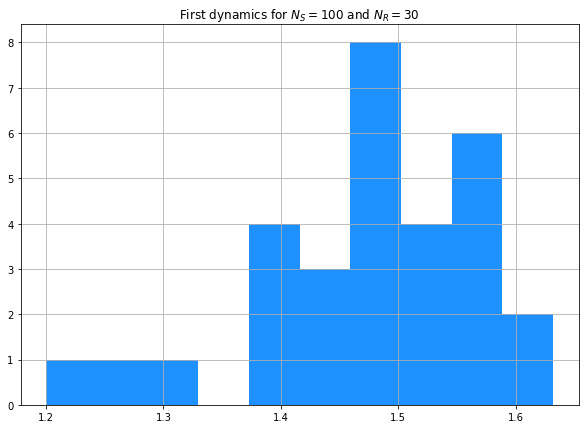

In [85]:
plt.figure(figsize = (10,7))
plt.hist(a[-1][:,:].sum(axis = 0), color = 'dodgerblue')
plt.grid()
plt.title('First dynamics for $N_S = 100$ and $N_R = 30$')
plt.show()

In [64]:
ns = 100
nr = 30
b = cpr(N = 100000,
    dt = 0.001,
    ns = 100,
    nr = 30,
    q = np.random.uniform(0.001,0.001,ns), 
    rho = np.random.uniform(0.6,0.8,size = ns), 
    s = np.random.uniform(50,200,nr), 
    xi = np.random.uniform(1000,1500,nr),  
    kn = np.random.uniform(10,50,size = nr), 
    kt = np.random.uniform(1,4,size = ns),  
    K = np.random.uniform(500,1000, size = nr),
    tau = np.random.uniform(10,50, size = ns),
    Phi = np.random.uniform(0.45,0.55,size = ns),
    m0 = np.random.uniform(1,5,size = ns),
    c0 = np.random.uniform(500, 1500, size = nr))['phi']

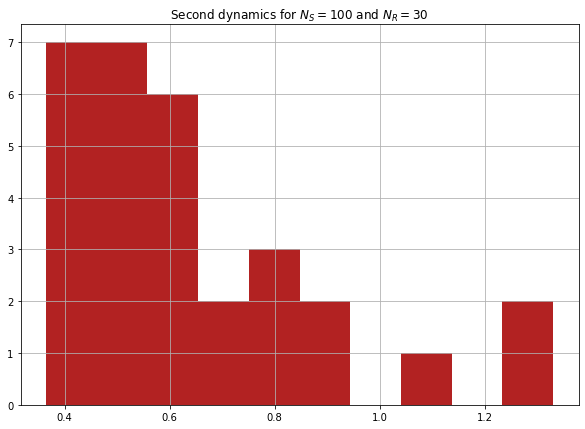

In [95]:
plt.figure(figsize = (10,7))
plt.hist(b[-1][:,:].sum(axis = 0), color = 'firebrick')
plt.grid()
plt.title('Second dynamics for $N_S = 100$ and $N_R = 30$')

plt.show()

In [76]:
ns = 100
nr = 80
c = cpr(N = 100000,
    dt = 0.001,
    ns = 100,
    nr = 80,
    q = np.random.uniform(0.001,0.001,ns), 
    rho = np.random.uniform(0.6,0.8,size = ns), 
    s = np.random.uniform(50,200,nr), 
    xi = np.random.uniform(1000,1500,nr),  
    kn = np.random.uniform(2,5,size = nr), 
    kt = np.random.uniform(10,40,size = ns),  
    K = np.random.uniform(500,1000, size = nr),
    tau = np.random.uniform(100,500, size = ns),
    Phi = np.random.uniform(0.45,0.55,size = ns),
    m0 = np.random.uniform(1,5,size = ns),
    c0 = np.random.uniform(5000, 15000, size = nr))['phi']

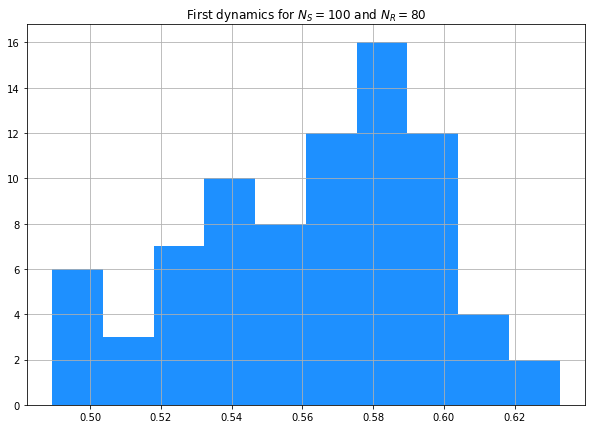

In [91]:
plt.figure(figsize = (10,7))
plt.hist(c[-1][:,:].sum(axis = 0), color = 'dodgerblue')
plt.grid()
plt.title('First dynamics for $N_S = 100$ and $N_R = 80$')

plt.show()

In [80]:
ns = 100
nr = 80
d = cpr(N = 100000,
    dt = 0.001,
    ns = 100,
    nr = 80,
    q = np.random.uniform(0.001,0.001,ns), 
    rho = np.random.uniform(0.6,0.8,size = ns), 
    s = np.random.uniform(50,200,nr), 
    xi = np.random.uniform(1000,1500,nr),  
    kn = np.random.uniform(10,50,size = nr), 
    kt = np.random.uniform(1,4,size = ns),  
    K = np.random.uniform(500,1000, size = nr),
    tau = np.random.uniform(10,50, size = ns),
    Phi = np.random.uniform(0.45,0.55,size = ns),
    m0 = np.random.uniform(1,5,size = ns),
    c0 = np.random.uniform(50, 150, size = nr))['phi']

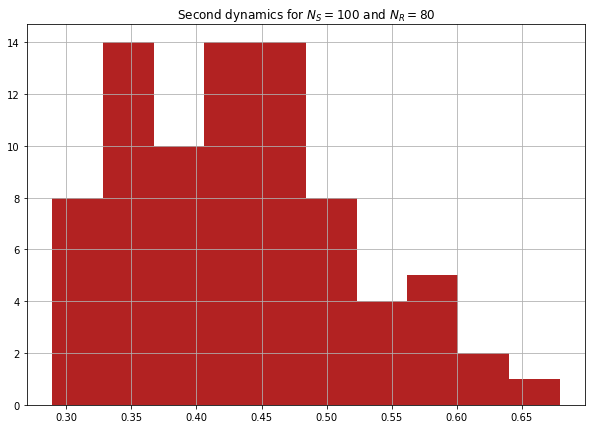

In [96]:
plt.figure(figsize = (10,7))
plt.hist(d[-1][:,:].sum(axis = 0), color = 'firebrick')
plt.grid()
plt.title('Second dynamics for $N_S = 100$ and $N_R = 80$')

plt.show()